# Portfolio analysis project - Marcus Johansson

1. Time frame discussion
2. Importing Libraries
3. Fundamental analysis
4. Portfolio weights discussion
5. Volatility for the portfolio as a whole
6. Risk free rate assumptions
7. Benchmarking discussion
8.  Interest rate changes
9. Conclusion of a portfolio with custom picked weights
10. Value at Risk and Expected Shortfall analysis
11. Historical Volatility for each asset
12. Monte Carlo simulation for Sharpe Ratio
13.  Efficient Frontier - Sharpe Ratio
14. Problems with my analysis
15. Statistical tests
A) Kolmogorov-Smirnov test to test for a normal distribution
B) AD Fuller Test
C) Covariance Tests
D) Correlation and
E) Granger causality tests
F) Johansen's cointegration test
G) ARCH and GARCH
H) ARCH and GARCH forecasting
15. Statistical tests conclusions
16. Monte Carlo simulation for Calmer Ratio
17. Efficient Frontier - Calmar Ratio
18. Monte Carlo and Efficient Frontier results
19. Fundamental Analysis and On-Chain Analysis of Solana
20. Technical Analysis on Solana
A) Average True Range
B) Relative Strength Index
C) Solana print and EMAs
D) Solana price and Ichimoku Cloud
E) Chaikin Money Flow over time
21. Results and Conclusion of the technical Analysis
22. Portfolio with Solana
23. Covariance for the portfolio with addition of Solana
24. Granger Causality tests for the portfolio with addition of Solana
25. Forecasted volatility with the addition of Solana through the GARCH and ARCH model
26.  Monte Carlo simulation for Calmer Ratio with Solana
27. Historical Volatility with the addition of Solana
28. Solana compared to the portfolio without Solana through statistical tests
A) Covariance with Solana
B) Granger Casuality test with Solana
C) Forecasted volatility with the addition of Solana through ARCH and GARCH
29. Historical volatility for the optimal portfolio
30. Value at Risk and Expected Shortfall for portfolio with Solana
 31. Alpha and Beta analysis between the portfolios
32. Conclusions

In [ ]:
!pip install quantstats

**Time frane discussion**
1. The start time has been defined as 2023-03-24 as that was the date Arbitrum was launched. Data for the analysis could therefore not be collected before that time period.
2. The end time has been defined as the current date of this analysis, which is 2024-02-20

**Importing libraries**

In [ ]:
import yfinance as yf
import quantstats as qs
import pandas as pd
qs.extend_pandas()
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

**Fundamental analysis**

The data has been collected from CoinMarketCap

1. Bitcoin (BTC-USD) is the first decentralized cryptocurrency and the leading digital currency worldwide. It’s known for its role in facilitating anonymous transactions by encrypting data.
2. Ethereum (ETH-USD): Ethereum is a decentralized, open-source blockchain featuring smart contract functionality. It is the second-largest cryptocurrency by market capitalization.
3. Chainlink (LINK-USD): Chainlink is a decentralized oracle network that provides real-world data to smart contracts on the blockchain.
4. Polkadot (DOT-USD): Polkadot is a multi-chain platform that allows different blockchains to interoperate in a shared security model.
5. Litecoin (LTC-USD): Litecoin is a peer-to-peer cryptocurrency that was created by Charlie Lee, a former Google engineer. It was one of the first altcoins and was designed to address some of Bitcoin’s potential shortcomings, such as Litecoin has a block time of just 2.5 minutes and extremely low transaction fees, making it suitable for micro-transactions and point-of-sale payments.
6. Uniswap (UNI7083-USD): Uniswap is a popular decentralized trading protocol known for its role in facilitating automated trading of decentralized finance tokens.
7. Stellar (XLM-USD): Stellar is an open-source, decentralized protocol for digital currency to fiat currency transfers which allows cross-border transactions between any pair of currencies.
8. Arbitrum (ARB11841-USD): Arbitrum is an Ethereum layer-two scaling solution. It uses optimistic rollups to achieve its goal of improving speed, scalability, and cost-efficiency on Ethereum.

**At the end will there an additional asset being added, as it is a big asset in the cryptocurrency industry, to test whether or not there is a good idea to add this to the portfolio**

9. Solana (SOL-USD): https://solana.com/solana-whitepaper.pdf , https://solana.com/ and https://coingape.com/education/anatoly-yakovenko/

Solana is a high-performance blockchain supporting builders around the world creating crypto apps that scale today.



**Discussion on Portfolio Weights**

The allocation of weights within the portfolio was determined by insights gained from my active engagement with the crypto market through platforms such as Reddit, Discord, and Twitter.

1. Bitcoin was assigned the highest weight in the portfolio due to its extensive data availability and significant institutional investor interest. Moreover, it was considered akin to a commodity, contributing to its weightage.

2. Ethereum received a smaller percentage allocation compared to Bitcoin. This decision was based on its technical capabilities, particularly in facilitating Decentralized Applications (DApps) and its utility in emerging technologies like Web3 and Non-Fungible Tokens (NFTs).

3. Chainlink's weightage was influenced by in-depth research conducted during my Master's program. Its Oracle model, despite bolstering security through various mechanisms, still carries inherent security risks, albeit common to many other crypto assets.

4. Polkadot was included in the portfolio after thorough examination of its Web3 Interoperability technology, which holds significant promise if successful.

5. Litecoin, Uniswap, Stellar, and Arbitrum were subsequently incorporated into the portfolio to ensure a comprehensive coverage of diverse assets, ultimately summing up to 100%.

This weighting strategy reflects a balanced approach aimed at capitalizing on the potential strengths and opportunities across various cryptocurrencies

In [ ]:
# Define the portfolio components
tickers = {'BTC-USD': 0.5,
           'ETH-USD': 0.2,
           'LINK-USD': 0.15,
           'DOT-USD': 0.05,
           'LTC-USD': 0.025,
           'UNI7083-USD': 0.025,
           'XLM-USD': 0.025,
           'ARB11841-USD': 0.025}

# Extract the ticker symbols from the dictionary
ticker_symbols = list(tickers.keys())

# Download the data for each ticker and calculate the portfolio returns
data = pd.DataFrame()
for ticker in ticker_symbols:
    df = yf.download(ticker, start = '2023-03-24', end = '2024-02-20')
    if data.empty:
        data = df['Adj Close'] * tickers[ticker]
    else:
        data += df['Adj Close'] * tickers[ticker]

portfolio_returns = data.pct_change().dropna()

print(portfolio_returns)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Date
2023-03-25   -0.000073
2023-03-26    0.018176
2023-03-27   -0.030610
2023-03-28    0.005433
2023-03-29    0.038902
                ...   
2024-02-15    0.002463
2024-02-16    0.004018
2024-02-17   -0.009455
2024-02-18    0.009406
2024-02-19   -0.005960
Name: Adj Close, Length: 332, dtype: float64


**Portfolio Volatility**

0.020783147474124214


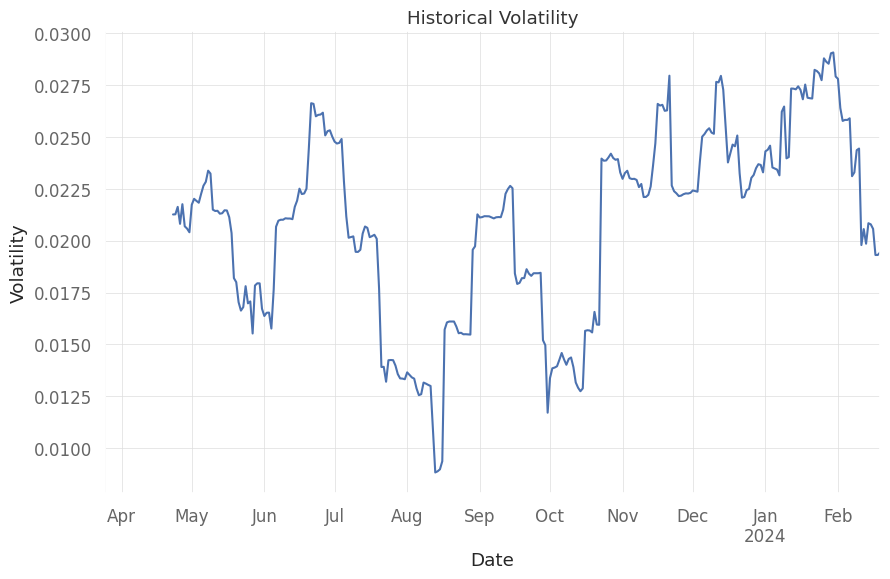

In [ ]:
full_portfolio_vol = portfolio_returns.rolling(window=30).std()

full_portfolio_vol.mean()

print(full_portfolio_vol.mean())

# Visualize historical volatility
full_portfolio_vol.plot(figsize=(10, 6))
plt.title('Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

**Risk-Free Rate Assumptions**

Considering the investment horizon spans nearly a year, from March 24, 2023, to February 20, 2024. The analysis is utilizing the annual risk-free rate in the portfolio simulation.

The risk-free rate sourced from the Federal Reserve on the 10-year bond is chosen for its global relevance, aligning with the international scope of cryptocurrency investments.

It's essential to acknowledge that interest rates are subject to fluctuations influenced by various factors such as central bank policies and economic conditions.

For the purposes of this analysis, the risk-free rate is set at 4.27%, as obtained from a reliable source, CNBC, on February 20, 2024. This rate reflects the prevailing economic outlook and market conditions at the time of assessment.




**Risk-Free rate calculations**

In [ ]:
risk_free_rate_annual = 0.0427
risk_free_rate_daily = (1 + risk_free_rate_annual) ** (1 / 252) - 1

print(risk_free_rate_annual)
print(risk_free_rate_daily)

0.0427
0.00016594036504535836


**Benchmarking discussion**
1. Nasdaq Crypto Index (^NCI) is a new index for Crypto and it does not have the applicable data for this time period
2. OMX Stockholm Technology PI has been excluded as its data was not avaible in the metrics calculations.
3. The NASDAQ as a whole has not been included as it is a benchmark for the technology industry as a whole and not particularly the cryptocurrency market
4. OMX Stockholm 30 Index has been excluded as it is not comparable to a cryptocurreny portfolio, as it contains different assets then technology assets  

Therefore has the **CMC Crypto 200 Index by Solactive (^CMC200)** been used for this analysis as it contains the whole cryptomarket minus stablecoins.

Here is their website: https://www.solactive.com/indices/?index=DE000SLA7P09#documents

[*********************100%%**********************]  1 of 1 completed


[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2023-03-28   2023-03-28
End Period                 2024-02-19   2024-02-19
Risk-Free Rate             4.27%        4.27%
Time in Market             69.0%        100.0%

Cumulative Return          84.5%        90.3%
CAGR﹪                     60.09%       63.94%

Sharpe                     1.43         1.52
Prob. Sharpe Ratio         84.25%       86.76%
Smart Sharpe               1.34         1.42
Sortino                    2.24         2.41
Smart Sortino              2.1          2.26
Sortino/√2                 1.58         1.71
Smart Sortino/√2           1.48         1.6
Omega                      1.33         1.33

Max Drawdown               -20.71%      -20.13%
Longest DD Days            192          101
Volatility (ann.)          33.85%       33.43%
R^2                        0.39         0.39
Information Ratio          0.0          0.0
Calmar               

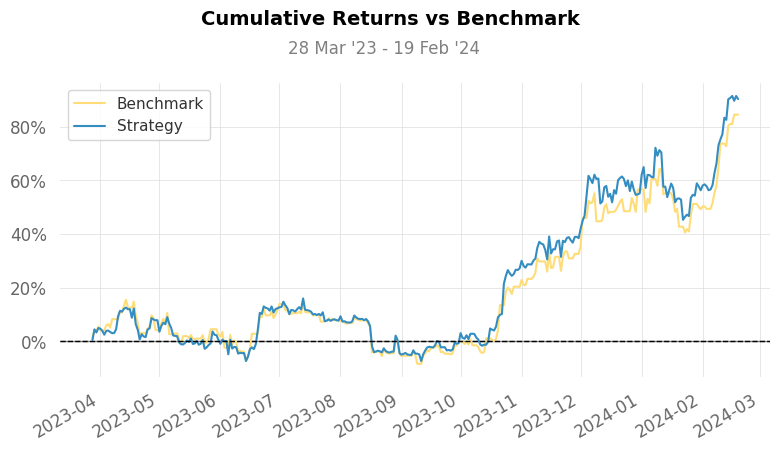

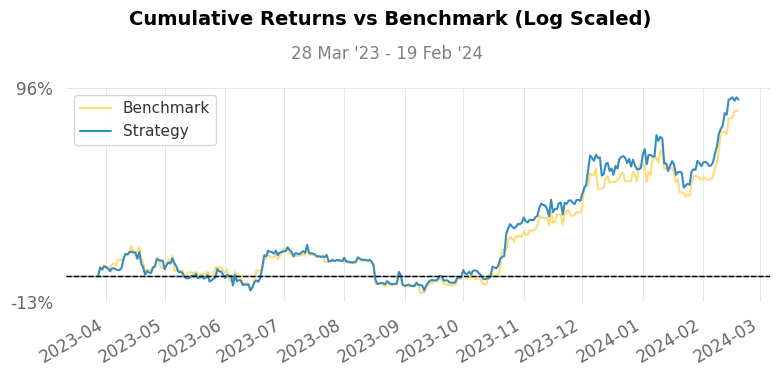

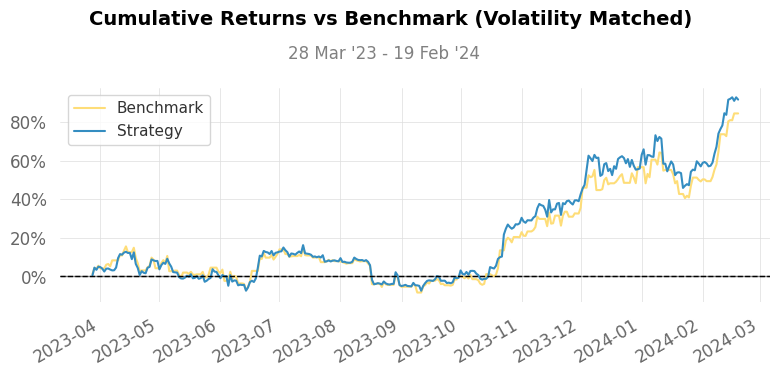

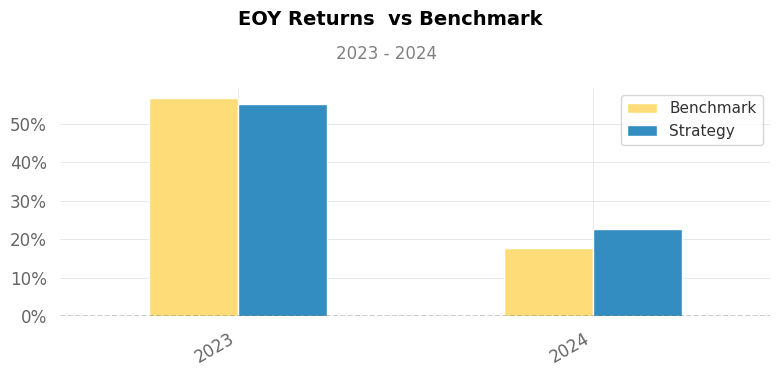

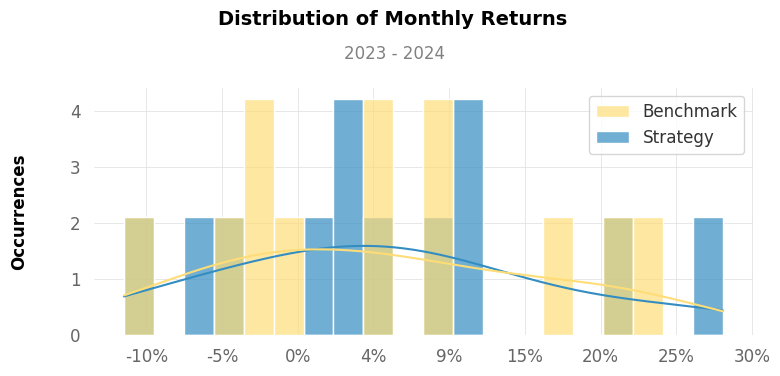

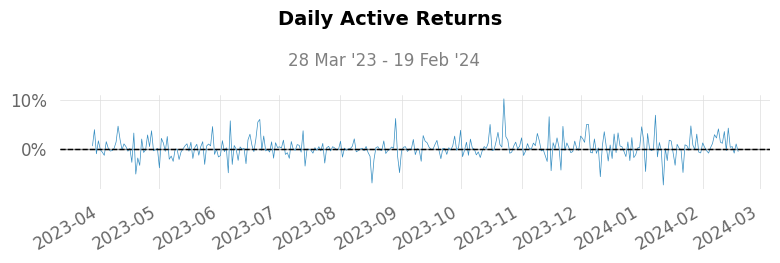

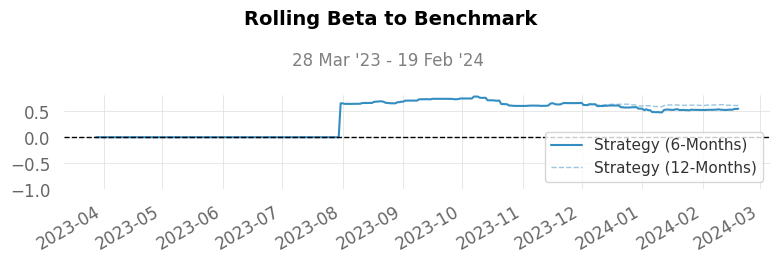

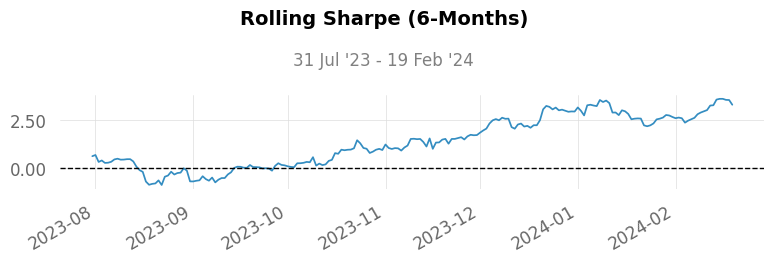

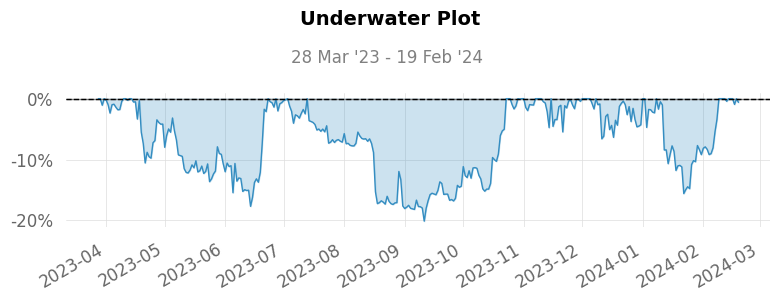

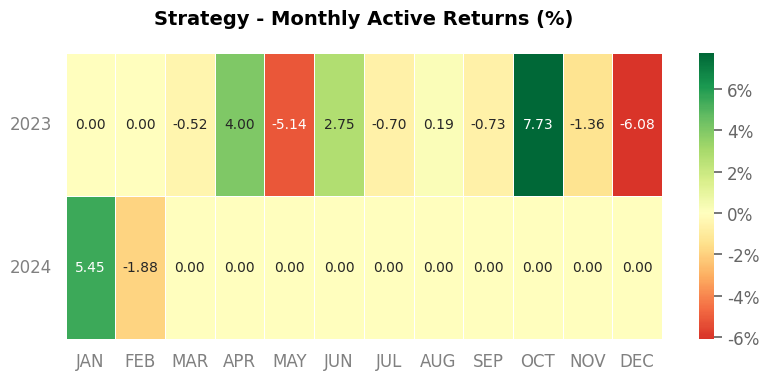

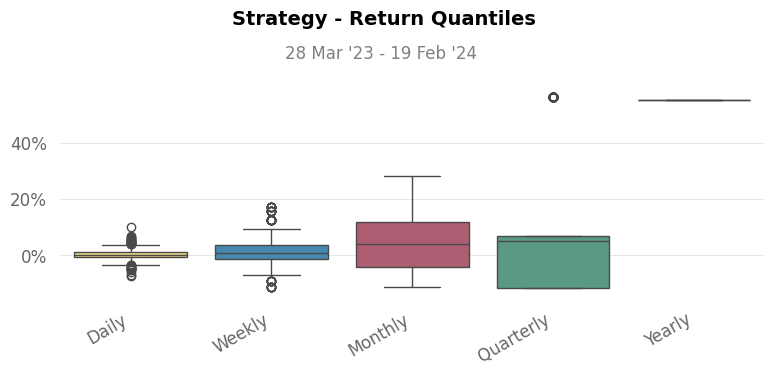

In [ ]:
#Portfolio Metrics with the Annual Risk Free Rate
qs.reports.full(portfolio_returns, benchmark='^CMC200', rf=risk_free_rate_annual, display=True, mode = 'advanced')

**How does interest rate changes change the portfolio returns?**

[*********************100%%**********************]  1 of 1 completed


[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2023-03-28   2023-03-28
End Period                 2024-02-19   2024-02-19
Risk-Free Rate             5.27%        5.27%
Time in Market             69.0%        100.0%

Cumulative Return          84.5%        90.3%
CAGR﹪                     60.09%       63.94%

Sharpe                     1.4          1.49
Prob. Sharpe Ratio         79.47%       82.42%
Smart Sharpe               1.32         1.39
Sortino                    2.19         2.37
Smart Sortino              2.05         2.22
Sortino/√2                 1.55         1.67
Smart Sortino/√2           1.45         1.57
Omega                      1.32         1.32

Max Drawdown               -20.71%      -20.13%
Longest DD Days            192          101
Volatility (ann.)          33.85%       33.43%
R^2                        0.39         0.39
Information Ratio          0.0          0.0
Calmar              

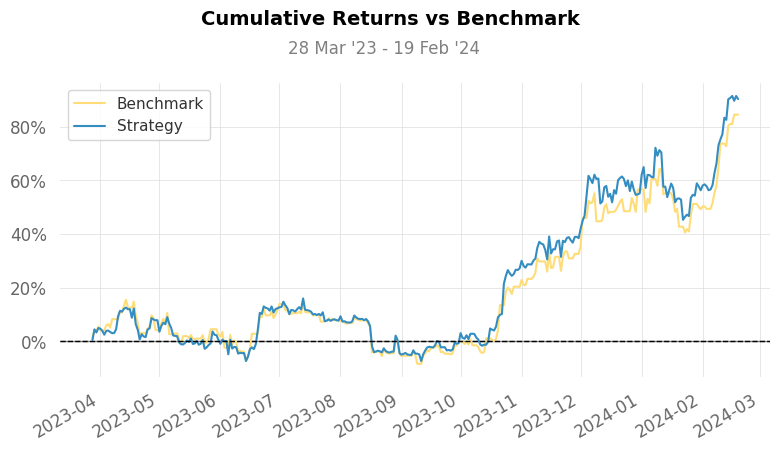

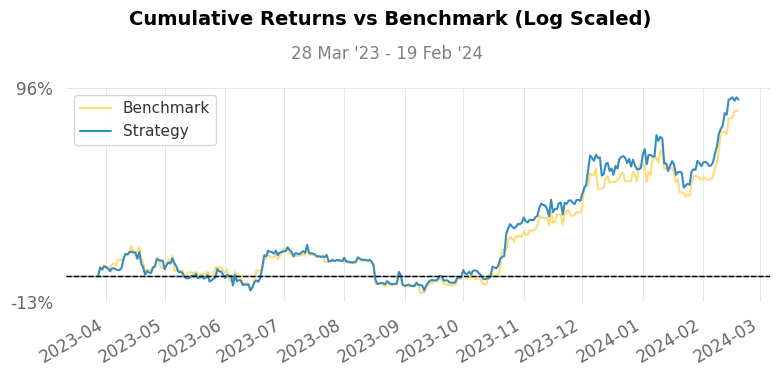

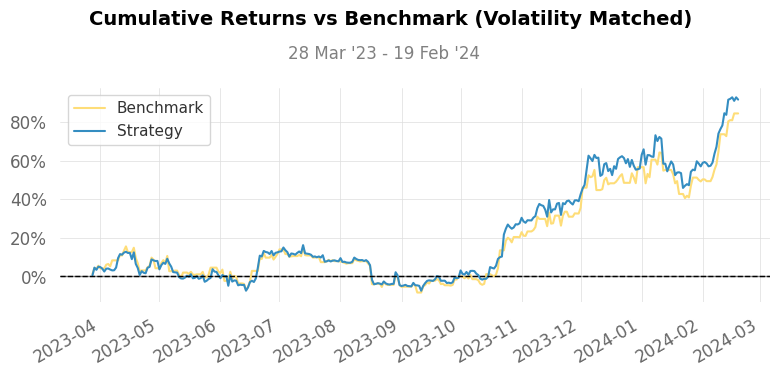

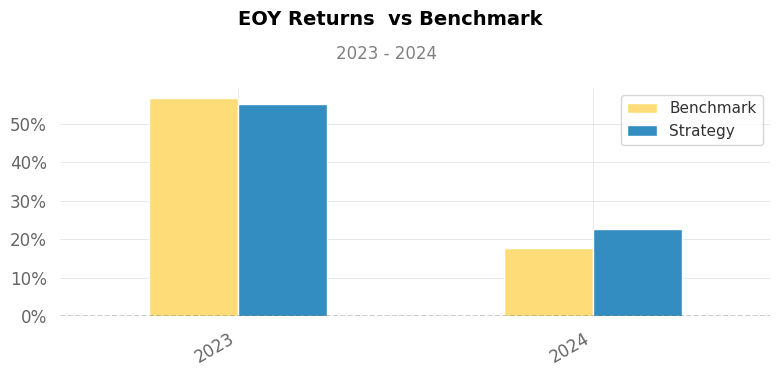

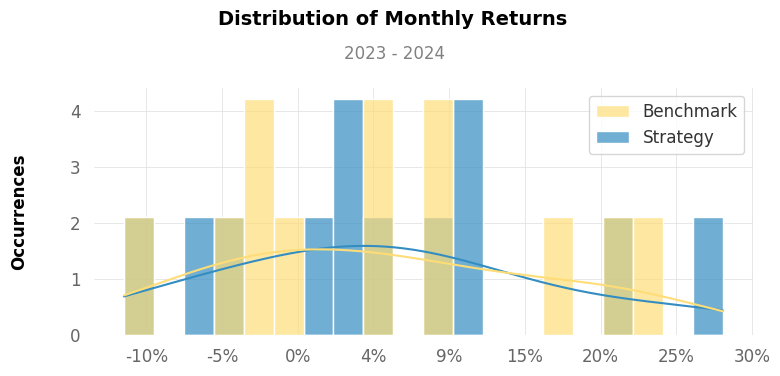

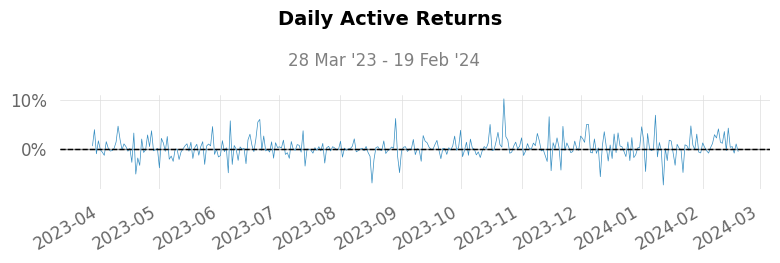

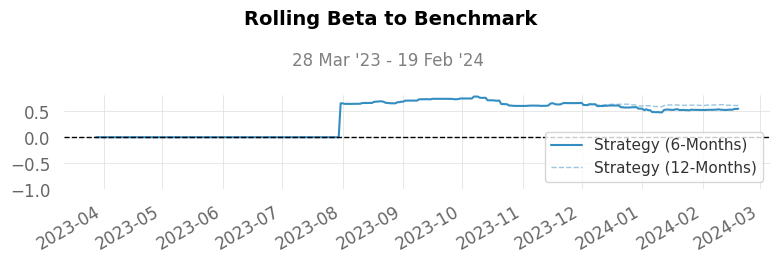

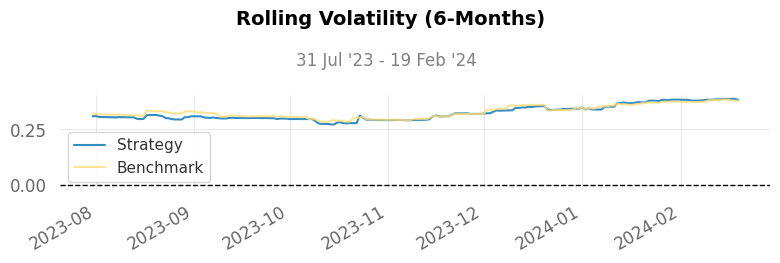

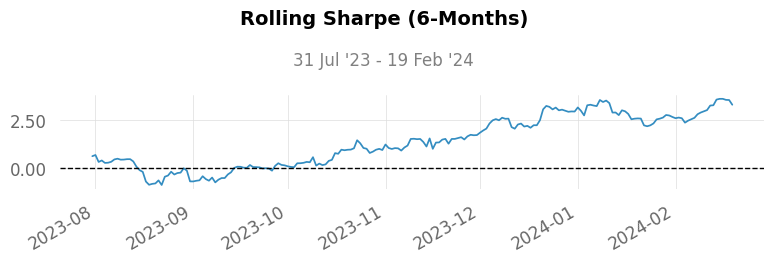

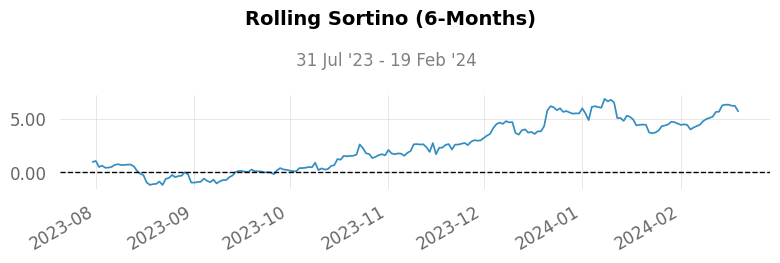

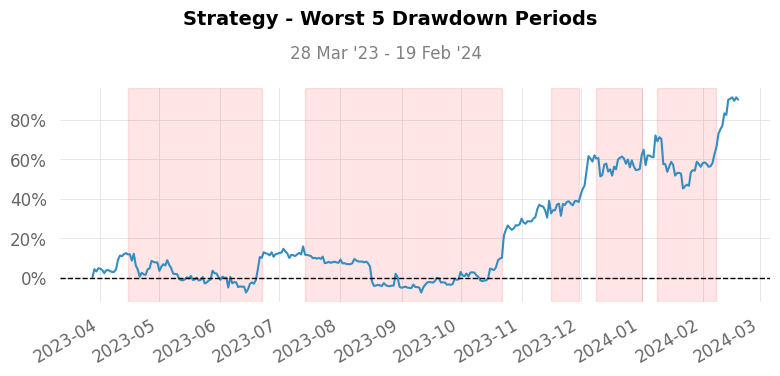

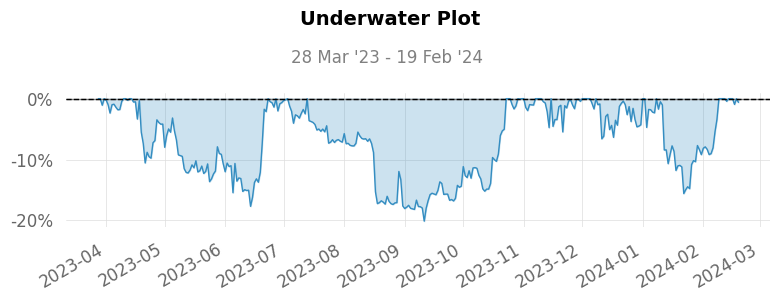

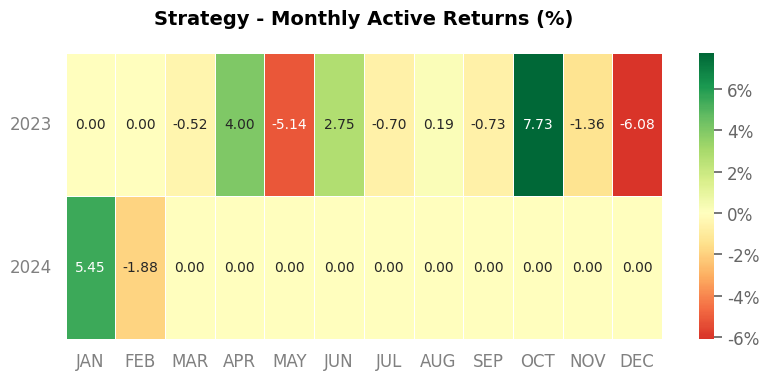

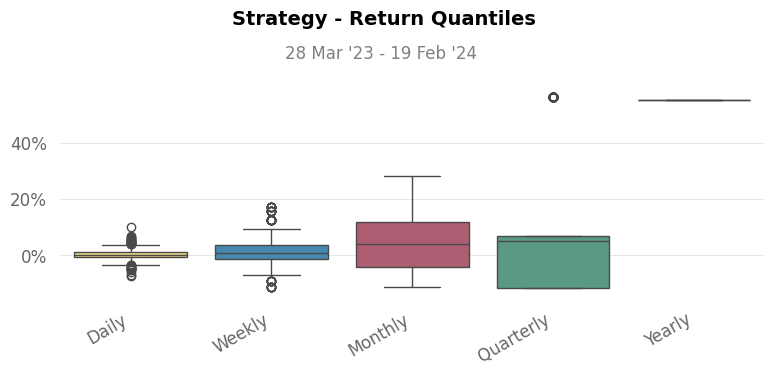

In [ ]:
# Increase and decrease in interest rates with 1%

risk_free_rate_annual = risk_free_rate_annual
increase_risk_free_rate_annual = risk_free_rate_annual + 0.01

qs.reports.full(portfolio_returns, benchmark='^CMC200', rf=increase_risk_free_rate_annual, display=True, mode = 'advanced')

[*********************100%%**********************]  1 of 1 completed


[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2023-03-28   2023-03-28
End Period                 2024-02-19   2024-02-19
Risk-Free Rate             3.27%        3.27%
Time in Market             69.0%        100.0%

Cumulative Return          84.5%        90.3%
CAGR﹪                     60.09%       63.94%

Sharpe                     1.46         1.55
Prob. Sharpe Ratio         88.23%       90.3%
Smart Sharpe               1.37         1.45
Sortino                    2.28         2.46
Smart Sortino              2.14         2.31
Sortino/√2                 1.61         1.74
Smart Sortino/√2           1.51         1.63
Omega                      1.34         1.34

Max Drawdown               -20.71%      -20.13%
Longest DD Days            192          101
Volatility (ann.)          33.85%       33.43%
R^2                        0.39         0.39
Information Ratio          0.0          0.0
Calmar               

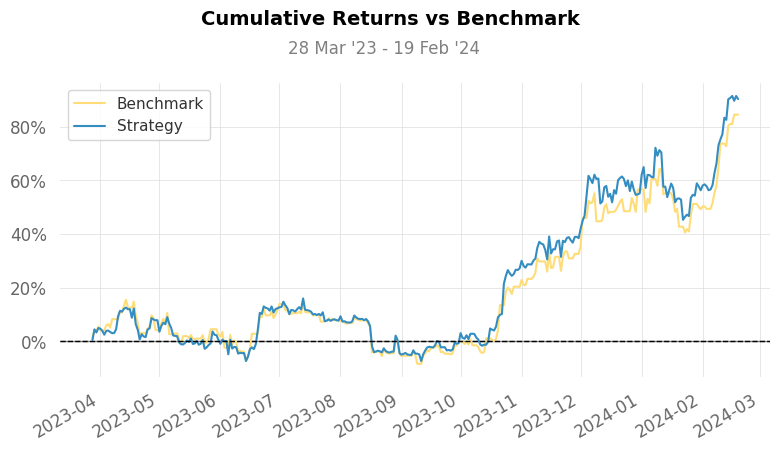

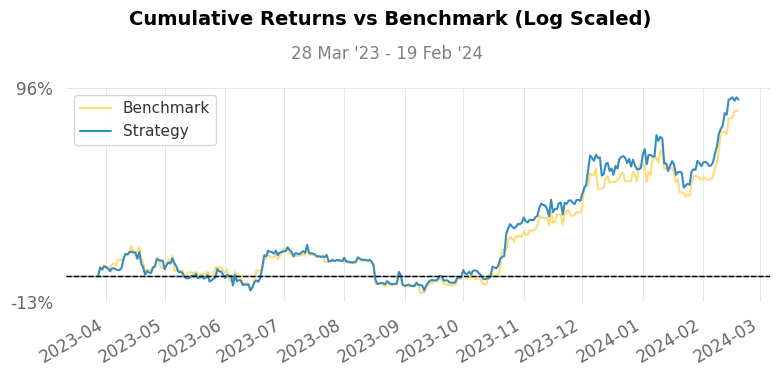

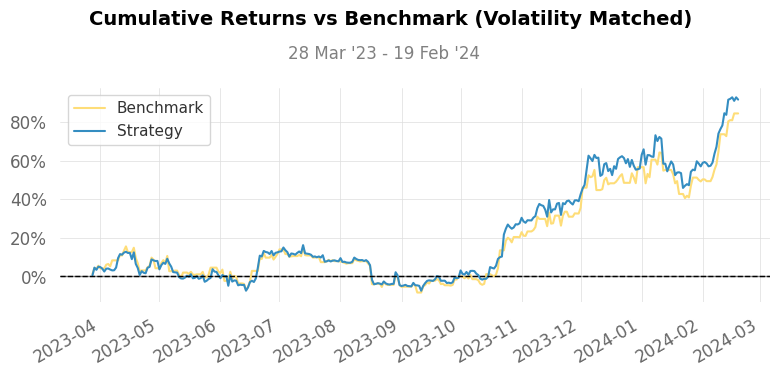

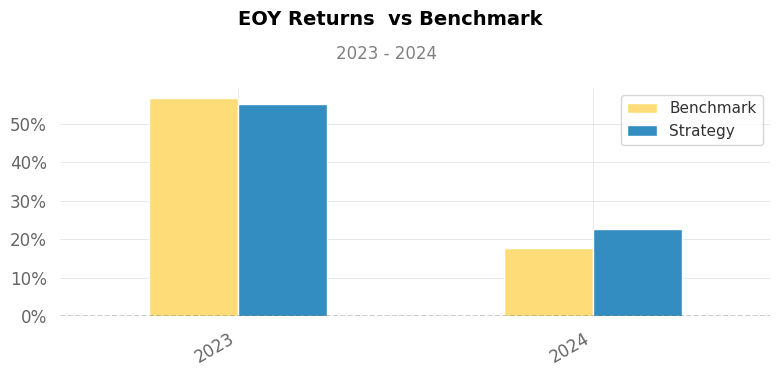

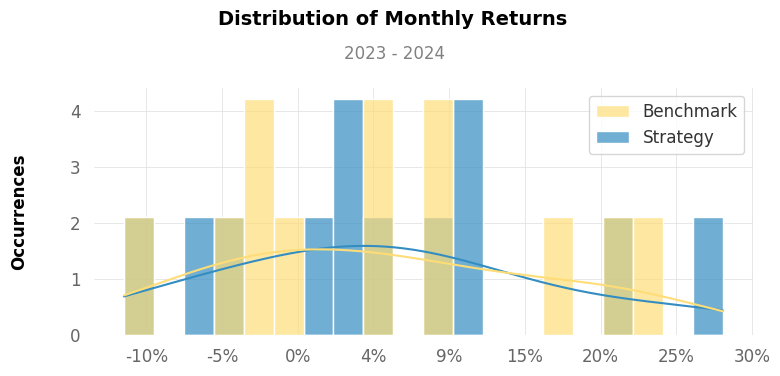

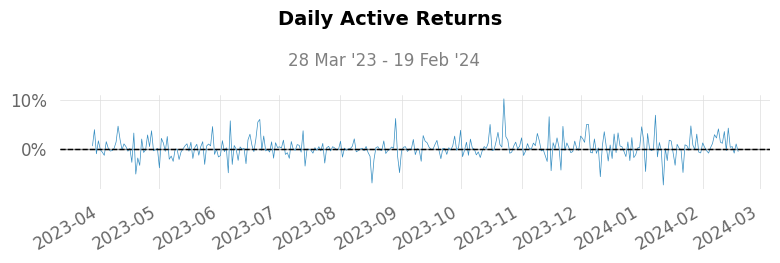

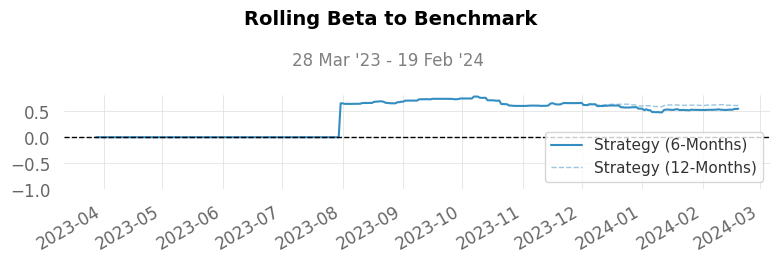

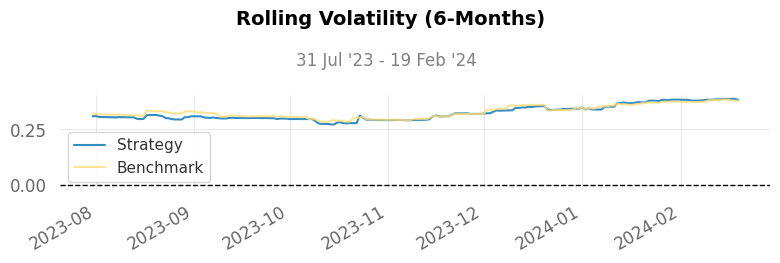

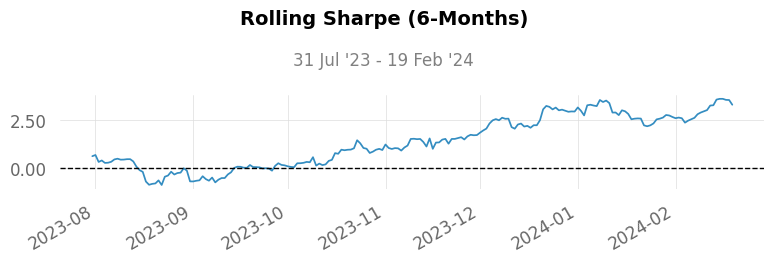

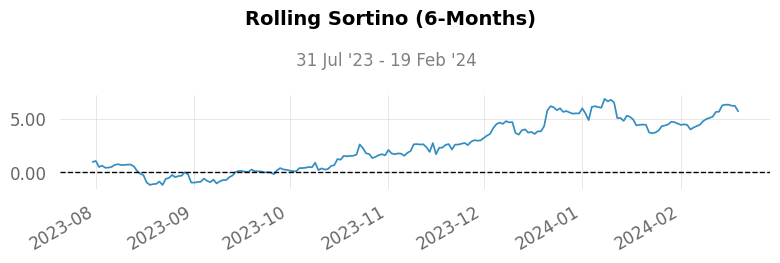

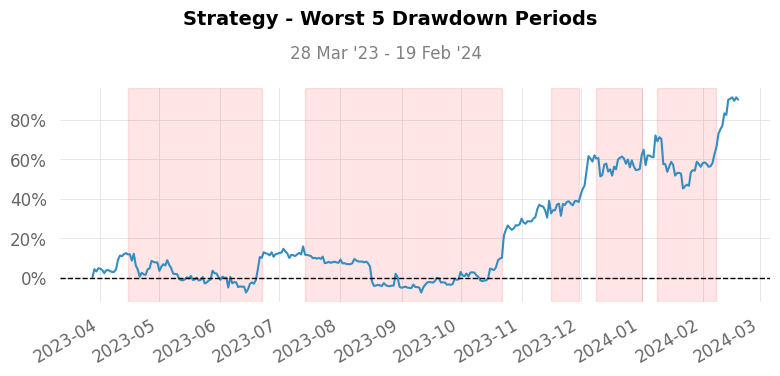

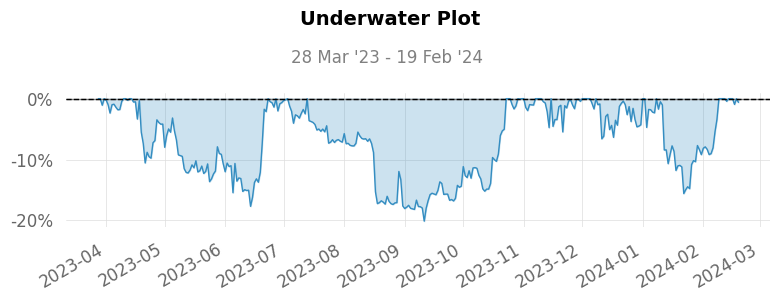

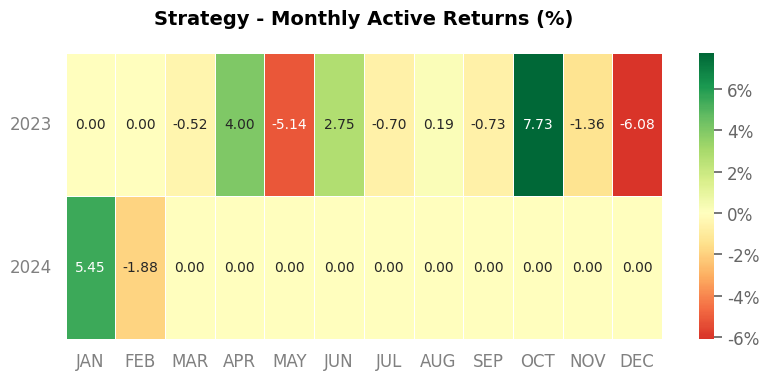

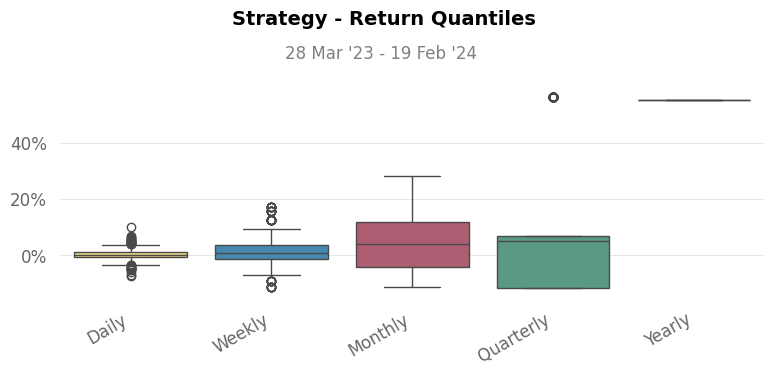

In [ ]:
#Decrease in risk-free rate
risk_free_rate_annual = risk_free_rate_annual
decrease_risk_free_rate_annual = risk_free_rate_annual - 0.01

qs.reports.full(portfolio_returns, benchmark='^CMC200', rf=decrease_risk_free_rate_annual, display=True, mode = 'advanced')

**Conclusion of Portfolio with Custom Weight Allocation**

1. The portfolio demonstrates superior performance over the benchmark in terms of Cumulative Return, achieving a notable 30.0% compared to the benchmark's 22.91%.

2. Additionally, the portfolio surpasses the benchmark in Sharpe Ratio, recording an impressive 0.99 compared to the benchmark's 0.77, indicating a better risk-adjusted return.

3. Notably, the portfolio exhibits lower estimated Volatility at 31.21% compared to the benchmark's 31.94%, further solidifying its performance superiority.

3. Despite the portfolio's overall outperformance, it experiences a slightly higher average drawdown of -5.49% compared to the benchmark's -3.72%. However, in terms of Max Drawdown, the portfolio performs marginally better with a lower figure of -20.13% compared to the benchmark's -20.71%.

4. While the benchmark displays characteristics closer to a normal distribution with skewness and kurtosis values approaching 0 and 3 respectively, the portfolio's skewness and kurtosis values deviate slightly.

5. An analysis of the impact of changes in the risk-free rate indicates that adjustments of 1% either upward or downward do not result in the benchmark outperforming the custom-picked portfolio. Thus, the portfolio maintains its competitive edge across different risk-free rate scenarios.

# Value at Risk and Expected Shortfall Analysis

The analysis reveals a 5% Value at Risk (VaR), indicating that there is a probability of 5% that the actual loss will exceed 3.8%.

Conversely, with a 95% confidence level, there is a likelihood that the loss will be less than or equal to 3.8%.

Furthermore, the Expected Shortfall, calculated at a 95% confidence level, is determined to be 5.2%. This metric provides insight into the average loss magnitude beyond the VaR threshold, offering a comprehensive understanding of potential downside risk.


In [ ]:
#Define Interest rates and Volatilities for the VaR analysis

# Create a pandas DataFrame for interest rates
interest_rates = pd.DataFrame({
    'Interest_Rates': np.random.normal(0.05, 0.01, 100) })


# Create a pandas DataFrame for volatilities
volatilities = pd.DataFrame({
    'Volatilities': np.random.normal(0.2, 0.05, 100) })


# Get the number of elements in portfolio_returns
num_elements = len(portfolio_returns)

# Create a pandas DataFrame for interest rates
interest_rates = pd.DataFrame({
    'Interest_Rates': np.random.normal(0.05, 0.01, num_elements) })

# Create a pandas DataFrame for volatilities
volatilities = pd.DataFrame({
    'Volatilities': np.random.normal(0.2, 0.05, num_elements) })


# Ensure the indices are aligned
interest_rates.index = portfolio_returns.index
volatilities.index = portfolio_returns.index

# Concatenate the independent variables (interest rates and volatilities) into a DataFrame
independent_vars = pd.concat([interest_rates, volatilities], axis=1)
independent_vars.columns = ['Interest_Rates', 'Volatilities']

# Concatenate the independent variables (interest rates and volatilities) into a DataFrame
independent_vars = pd.concat([interest_rates, volatilities], axis=1)
independent_vars.columns = ['Interest_Rates', 'Volatilities']

# Reindex independent_vars to match the index of portfolio_returns
independent_vars = independent_vars.reindex(portfolio_returns.index)

# Drop any rows with NaN values
independent_vars = independent_vars.dropna()
portfolio_returns = portfolio_returns.dropna()

# Add a constant term for the intercept
independent_vars = sm.add_constant(independent_vars)

# Fit a multiple linear regression model
model = sm.OLS(portfolio_returns, independent_vars)
results = model.fit()

# Print the regression summary
print(results.summary())

# Extract the coefficients
coefficients = results.params

# Calculate the VaR using the coefficients
# Assuming alpha is the significance level (e.g., 0.05 for 95% confidence level)
alpha = 0.05
portfolio_returns_estimated = np.dot(independent_vars, coefficients)
portfolio_returns_residuals = portfolio_returns - portfolio_returns_estimated
residual_std = np.std(portfolio_returns_residuals)
z_score = np.abs(stats.norm.ppf(alpha/2))
VaR = z_score * residual_std


print("Value-at-Risk (VaR) at", alpha, "confidence level:", VaR)

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.032
Date:                Sun, 25 Feb 2024   Prob (F-statistic):              0.357
Time:                        00:40:33   Log-Likelihood:                 812.10
No. Observations:                 332   AIC:                            -1618.
Df Residuals:                     329   BIC:                            -1607.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0031      0.008      0.

In [ ]:
#Espected Shortfall

ES = -np.mean(portfolio_returns[portfolio_returns < -VaR])

print(ES)

0.054226952133330376


In [ ]:
#HTML report for this stage of the analysis

qs.reports.html(returns=portfolio_returns, output='custom_weight_portfolio.html', benchmark='^CMC200')

# Portfolio simulations for an optimal portfolio


The Monte Carlo analysis and the statistical tests need to take the return for each asset into consideration for its calculations

In [ ]:
# Define the assets for the Monte Carlo simulation
assets = ['BTC-USD', 'ETH-USD', 'LINK-USD', 'DOT-USD', 'LTC-USD', 'UNI7083-USD', 'XLM-USD', 'ARB11841-USD']

# Download historical returns data for each asset
returns_data = {}
for asset in assets:
    data = yf.download(asset, start='2023-03-24', end='2024-02-20')['Adj Close'].pct_change().dropna()
    returns_data[asset] = data

returns_df = pd.DataFrame(returns_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
print(returns_df)

             BTC-USD   ETH-USD  LINK-USD   DOT-USD   LTC-USD  UNI7083-USD  \
Date                                                                        
2023-03-25  0.000052 -0.004726 -0.016937 -0.019803 -0.022717    -0.028822   
2023-03-26  0.018172  0.018301  0.025023  0.024268  0.021228     0.012693   
2023-03-27 -0.030522 -0.033912 -0.053615 -0.029483 -0.045745    -0.025449   
2023-03-28  0.004725  0.033417  0.012016  0.032489 -0.001205     0.030467   
2023-03-29  0.039618  0.011404  0.061419  0.019179  0.024707     0.022107   
...              ...       ...       ...       ...       ...          ...   
2024-02-15  0.002158  0.016731 -0.016203  0.015642 -0.001213     0.089118   
2024-02-16  0.004268 -0.007325 -0.018899 -0.015489  0.011541    -0.006577   
2024-02-17 -0.009532 -0.006070  0.023618  0.006108 -0.008887     0.042302   
2024-02-18  0.008895  0.033131  0.003090  0.018912  0.010582    -0.015297   
2024-02-19 -0.006588  0.022430 -0.013729  0.022815  0.008226     0.006890   

**Historical Volatility for each asset**

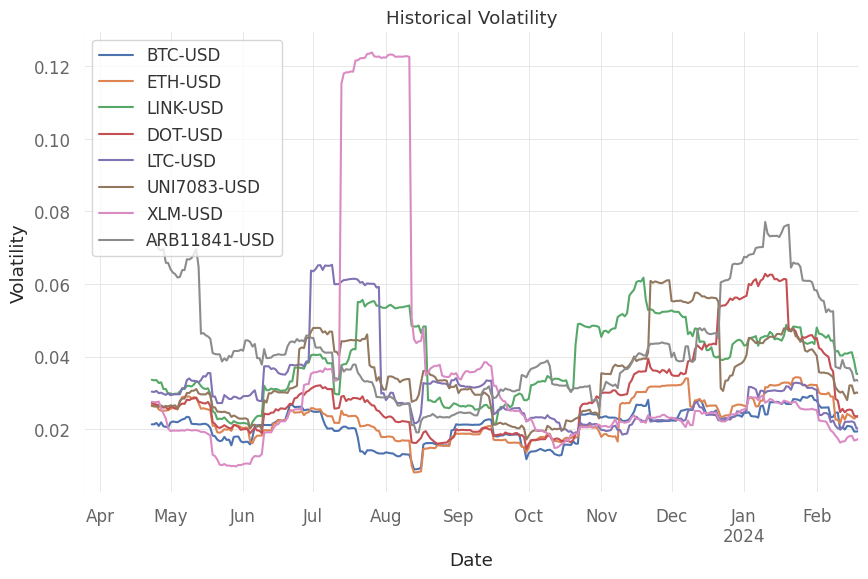

In [ ]:
# What is the historical volatility for each asset over a 30-day window?

#Calculate historical volatility over a 30-day window

historical_volatility = returns_df.rolling(window=30).std()

# Visualize historical volatility
historical_volatility.plot(figsize=(10, 6))
plt.title('Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


**Monte Carlo simulation**

In [ ]:

# Initialize the components, to run a Monte Carlo Simulation.
num_of_portfolios = 10000
num_elements = len(assets)

# Prep an array to store the weights as they are generated.
all_weights = np.zeros((num_of_portfolios, num_elements))

# Prep an array to store the returns as they are generated.
ret_arr = np.zeros(num_of_portfolios)

# Prep an array to store the volatilities as they are generated.
vol_arr = np.zeros(num_of_portfolios)

# Prep an array to store the sharpe ratios as they are generated.
sharpe_arr = np.zeros(num_of_portfolios)

# Start the simulations.
for ind in range(num_of_portfolios):
    # Generate random weights
    weights = np.random.random(num_elements)
    weights /= np.sum(weights)  # Normalize to ensure sum(weights) = 1

    # Calculate portfolio return
    portfolio_return = np.sum(returns_df.mean() * weights) * 252
    ret_arr[ind] = portfolio_return

    # Calculate portfolio volatility
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns_df.cov() * 252, weights)))
    vol_arr[ind] = portfolio_volatility

    # Calculate Sharpe ratio
    sharpe_ratio = portfolio_return / portfolio_volatility
    sharpe_arr[ind] = sharpe_ratio

    # Save weights
    all_weights[ind, :] = weights

# Create DataFrame for Monte Carlo simulation results
simulations_df = pd.DataFrame({
    'Returns': ret_arr,
    'Volatility': vol_arr,
    'Sharpe Ratio': sharpe_arr,
    'Portfolio Weights': [weights for weights in all_weights]
})

print(simulations_df.head())


    Returns  Volatility  Sharpe Ratio  \
0  0.436122    0.426620      1.022273   
1  0.458768    0.444595      1.031879   
2  0.514031    0.428713      1.199010   
3  0.448208    0.436111      1.027739   
4  0.589620    0.460571      1.280194   

                                   Portfolio Weights  
0  [0.1493290924624147, 0.03020735371113413, 0.06...  
1  [0.02794848967890251, 0.10116313185207795, 0.1...  
2  [0.09249650830896274, 0.19045232365951384, 0.1...  
3  [0.08176605935978744, 0.0622039469675941, 0.16...  
4  [0.0870514652528744, 0.06578007574351319, 0.23...  


In [ ]:
# Max Sharpe Ratio from the simulation
max_sharpe_ratio = simulations_df.loc[simulations_df['Sharpe Ratio'].idxmax()]

pd.set_option('display.max_colwidth', None)
print(max_sharpe_ratio)

Returns                                                                                                                                                                               0.614672
Volatility                                                                                                                                                                            0.403714
Sharpe Ratio                                                                                                                                                                          1.522543
Portfolio Weights    [0.25691393775570787, 0.232622500489081, 0.2529625287209001, 0.0650962985104417, 0.00033912684353260214, 0.046471001138322414, 0.018016012760819898, 0.12757859378119452]
Name: 6841, dtype: object


In [ ]:
# Min Volatility from the simulation
min_volatility = simulations_df.loc[simulations_df['Volatility'].idxmin()]

pd.set_option('display.max_colwidth', None)
print(min_volatility)

Returns                                                                                                                                                                              0.469656
Volatility                                                                                                                                                                           0.352719
Sharpe Ratio                                                                                                                                                                          1.33153
Portfolio Weights    [0.3612706201665241, 0.32608928862225567, 0.03717225643058006, 0.09325787795739766, 0.031679847997268536, 0.1258059903484313, 0.005391779813814002, 0.01933233866372873]
Name: 1840, dtype: object


In [ ]:
# Max Volatility from the simulation
max_volatility = simulations_df.loc[simulations_df['Volatility'].idxmax()]

pd.set_option('display.max_colwidth', None)
print(max_volatility)

Returns                                                                                                                                                                            0.560915
Volatility                                                                                                                                                                         0.551339
Sharpe Ratio                                                                                                                                                                        1.01737
Portfolio Weights    [0.1502418560035936, 0.04523475205209853, 0.02572775841724132, 0.0905964068503846, 0.017183952272758415, 0.01858919490674364, 0.01817786086183664, 0.6342482186353432]
Name: 989, dtype: object


**Data analyzed in the Efficient Frontier**

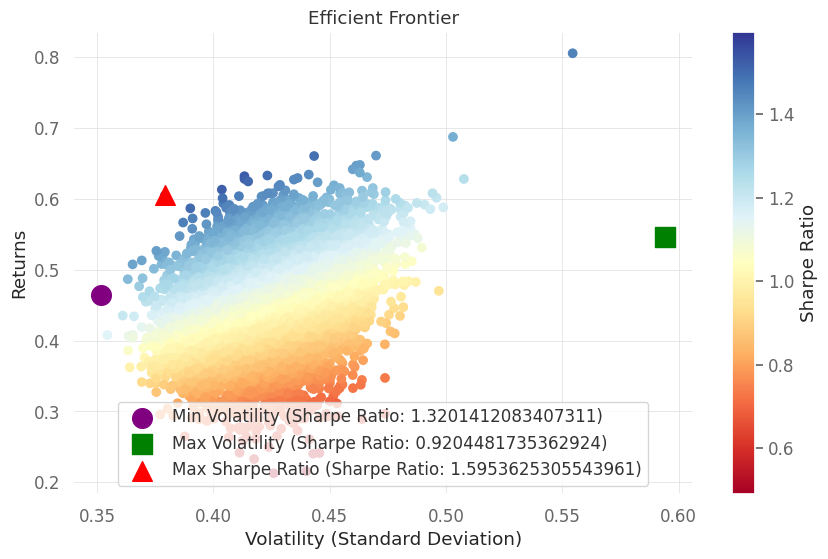

In [ ]:
# Plot the data for the Efficient Frontier
plt.scatter(
    y=simulations_df['Returns'],
    x=simulations_df['Volatility'],
    c=simulations_df['Sharpe Ratio'],
    cmap='RdYlBu'
)

# Plot some details.
plt.title('Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Returns')

# Return the Min Volatility from the run.
min_volatility = simulations_df.loc[simulations_df['Volatility'].idxmin()]

# Plot the Min Volatility.
plt.scatter(
    min_volatility['Volatility'],
    min_volatility['Returns'],
    marker='o',
    color='purple',
    s=200,
    label=f"Min Volatility (Sharpe Ratio: {min_volatility['Sharpe Ratio']})"
)

# Return the Max Volatility from the run.
max_volatility = simulations_df.loc[simulations_df['Volatility'].idxmax()]

# Plot the Max Volatility.
plt.scatter(
    max_volatility['Volatility'],
    max_volatility['Returns'],
    marker='s',
    color='green',
    s=200,
    label=f"Max Volatility (Sharpe Ratio: {max_volatility['Sharpe Ratio']})"
)

# Return the Max Sharpe Ratio from the run.
max_sharpe_ratio = simulations_df.loc[simulations_df['Sharpe Ratio'].idxmax()]

# Plot the Max Sharpe Ratio.
plt.scatter(
    max_sharpe_ratio['Volatility'],
    max_sharpe_ratio['Returns'],
    marker='^',
    color='red',
    s=200,
    label=f"Max Sharpe Ratio (Sharpe Ratio: {max_sharpe_ratio['Sharpe Ratio']})"
)

plt.legend(loc='lower center')
plt.show()


**Problems with my analysis**

**Results:**
- Returns: 0.614672
- Volatility: 0.403714
- Sharpe Ratio: 1.522543

**Solution**

1. In addition to the Efficient Frontier analysis, rigorous statistical tests will be conducted to assess the assumption of normal distribution in asset returns. This step is crucial as deviations from normality can significantly impact the reliability of the analysis.

2. Furthermore, to enhance the robustness of risk-adjusted return metrics, an alternative approach will be employed. This involves evaluating Maximum Drawdown and Calmar Ratio through Monte Carlo simulations integrated within the Efficient Frontier framework. By utilizing multiple methodologies, a comprehensive understanding of risk-adjusted returns will be attained.

3. Particularly relevant in the context of cryptocurrencies' inherent volatility, the RoMaD metric will give insight to the impact of extreme events and tail risks. TThis analysis is crucial for fully understanding the risks in the cryptocurrency market, as cryptocurrencies are susceptible to sudden and significant fluctuations in value.




# Statistical Tests

In [ ]:
#To do Time Series analysis we need to convert the data to a time series data frame

returns_dt = returns_df
returns_dt.index = pd.to_datetime(returns_dt.index)
print(returns_dt.head())

             BTC-USD   ETH-USD  LINK-USD   DOT-USD   LTC-USD  UNI7083-USD  \
Date                                                                        
2023-03-25  0.000052 -0.004726 -0.016937 -0.019803 -0.022717    -0.028822   
2023-03-26  0.018172  0.018301  0.025023  0.024268  0.021228     0.012693   
2023-03-27 -0.030522 -0.033912 -0.053615 -0.029483 -0.045745    -0.025449   
2023-03-28  0.004725  0.033417  0.012016  0.032489 -0.001205     0.030467   
2023-03-29  0.039618  0.011404  0.061419  0.019179  0.024707     0.022107   

             XLM-USD  ARB11841-USD  
Date                                
2023-03-25  0.021095     -0.037554  
2023-03-26  0.013255      0.047856  
2023-03-27  0.006927     -0.093983  
2023-03-28  0.055238      0.047348  
2023-03-29  0.042727      0.005259  


**Kolmogorov-Smirnov test**

In [ ]:
# Define parameters of the normal distribution (mean and standard deviation)
mu = 0  # mean
sigma = 1  # standard deviation

alpha = 0.05  # significance level

# Perform Kolmogorov-Smirnov test for each column in the DataFrame
for column in returns_df.columns:
    sample_data = returns_df[column]
    statistic, p_value = stats.kstest(sample_data, 'norm', args=(mu, sigma))

    # Print the results for each column
    print("Column:", column)
    print("Kolmogorov-Smirnov Statistic:", statistic)
    print("P-value:", p_value)

    # Interpret the results
    if p_value < alpha:
        print("Reject the null hypothesis: The distributions are different.")
    else:
        print("Fail to reject the null hypothesis: The distributions are not significantly different.")

Column: BTC-USD
Kolmogorov-Smirnov Statistic: 0.4708807423271883
P-value: 4.67903864185462e-68
Reject the null hypothesis: The distributions are different.
Column: ETH-USD
Kolmogorov-Smirnov Statistic: 0.47033470202141997
P-value: 6.859412234999179e-68
Reject the null hypothesis: The distributions are different.
Column: LINK-USD
Kolmogorov-Smirnov Statistic: 0.4573296084718577
P-value: 5.267125835247504e-64
Reject the null hypothesis: The distributions are different.
Column: DOT-USD
Kolmogorov-Smirnov Statistic: 0.46349516957028136
P-value: 7.881881501037555e-66
Reject the null hypothesis: The distributions are different.
Column: LTC-USD
Kolmogorov-Smirnov Statistic: 0.4729650576526466
P-value: 1.0808614631057425e-68
Reject the null hypothesis: The distributions are different.
Column: UNI7083-USD
Kolmogorov-Smirnov Statistic: 0.45956951555277264
P-value: 1.153750766392699e-64
Reject the null hypothesis: The distributions are different.
Column: XLM-USD
Kolmogorov-Smirnov Statistic: 0.46

**AD Fuller Test**

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for each asset
adf_results = {}
for asset in assets:
    result = adfuller(returns_dt[asset])
    adf_results[asset] = {'ADF Statistic': result[0], 'p-value': result[1]}

# Convert results to DataFrame for easier visualization
adf_results_df = pd.DataFrame(adf_results).T
print(adf_results_df)

              ADF Statistic       p-value
BTC-USD          -19.370425  0.000000e+00
ETH-USD          -20.418889  0.000000e+00
LINK-USD         -18.780949  2.024252e-30
DOT-USD          -19.466002  0.000000e+00
LTC-USD          -18.544615  2.095765e-30
UNI7083-USD      -19.207260  0.000000e+00
XLM-USD           -6.001944  1.649393e-07
ARB11841-USD     -18.921730  0.000000e+00


**Covariance Test**

In [ ]:
# Calculate covariance matrix from the returns of all the INDUVIDUAL assets
covariance_matrix = returns_df.cov()

In [ ]:
print(covariance_matrix)

               BTC-USD   ETH-USD  LINK-USD   DOT-USD   LTC-USD  UNI7083-USD  \
BTC-USD       0.000446  0.000382  0.000453  0.000436  0.000394     0.000396   
ETH-USD       0.000382  0.000555  0.000541  0.000477  0.000480     0.000524   
LINK-USD      0.000453  0.000541  0.001590  0.000801  0.000704     0.000780   
DOT-USD       0.000436  0.000477  0.000801  0.001010  0.000578     0.000756   
LTC-USD       0.000394  0.000480  0.000704  0.000578  0.001009     0.000655   
UNI7083-USD   0.000396  0.000524  0.000780  0.000756  0.000655     0.001288   
XLM-USD       0.000369  0.000473  0.000784  0.000628  0.000618     0.000655   
ARB11841-USD  0.000499  0.000761  0.000868  0.000743  0.000655     0.000836   

               XLM-USD  ARB11841-USD  
BTC-USD       0.000369      0.000499  
ETH-USD       0.000473      0.000761  
LINK-USD      0.000784      0.000868  
DOT-USD       0.000628      0.000743  
LTC-USD       0.000618      0.000655  
UNI7083-USD   0.000655      0.000836  
XLM-USD       0

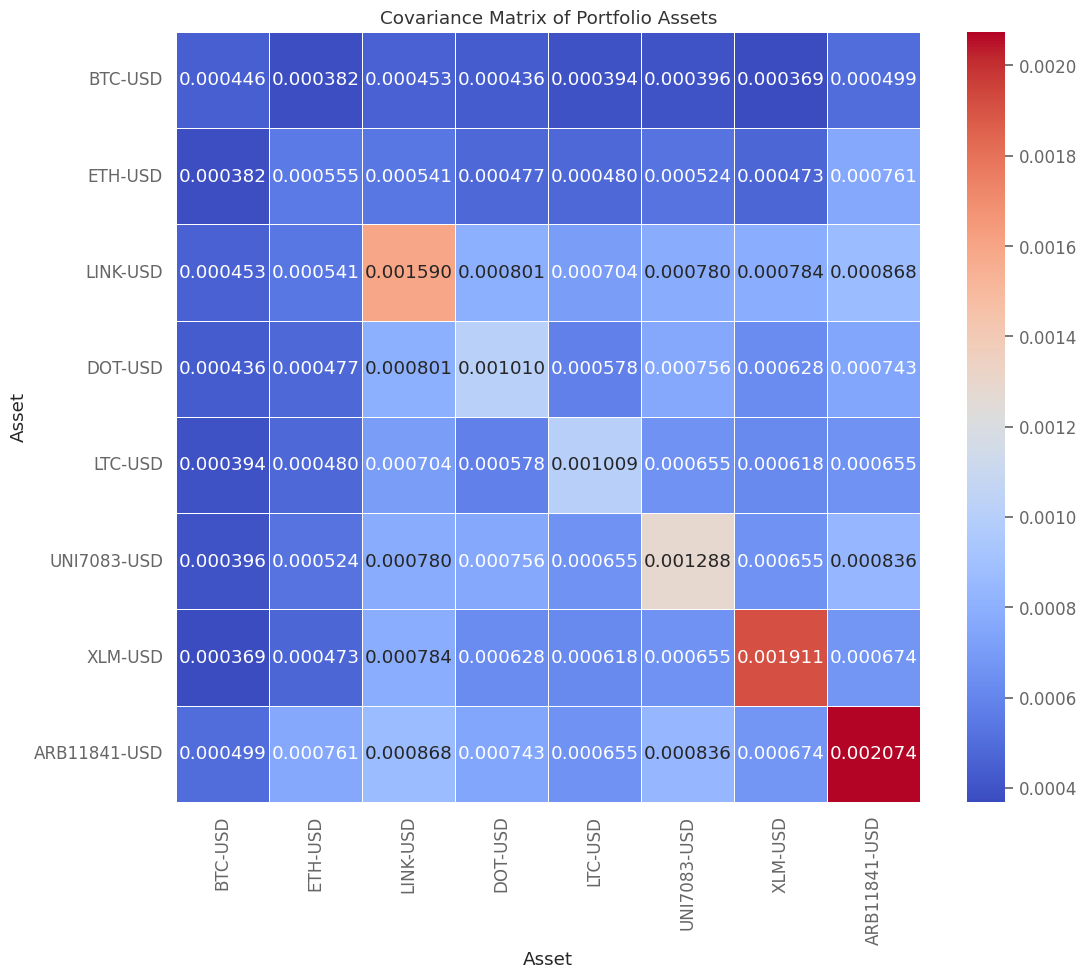

In [ ]:
# Visualize covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".6f", linewidths=.5)
plt.title('Covariance Matrix of Portfolio Assets')
plt.xlabel('Asset')
plt.ylabel('Asset')
plt.show()

In [ ]:
# Calculate average covariance
average_covariance = covariance_matrix.mean().mean()
print("Average Covariance:", average_covariance)

Average Covariance: 0.0006831781389228853


**Correlation**

In [ ]:
# Correlation
correlation_matrix = returns_dt.corr()

print(returns_dt.corr())

               BTC-USD   ETH-USD  LINK-USD   DOT-USD   LTC-USD  UNI7083-USD  \
BTC-USD       1.000000  0.768512  0.538374  0.648778  0.586760     0.522606   
ETH-USD       0.768512  1.000000  0.575593  0.637270  0.642099     0.619879   
LINK-USD      0.538374  0.575593  1.000000  0.632275  0.555890     0.545389   
DOT-USD       0.648778  0.637270  0.632275  1.000000  0.572380     0.663142   
LTC-USD       0.586760  0.642099  0.555890  0.572380  1.000000     0.574514   
UNI7083-USD   0.522606  0.619879  0.545389  0.663142  0.574514     1.000000   
XLM-USD       0.399889  0.459409  0.449781  0.452155  0.445425     0.417402   
ARB11841-USD  0.518760  0.709181  0.478169  0.513467  0.452524     0.511200   

               XLM-USD  ARB11841-USD  
BTC-USD       0.399889      0.518760  
ETH-USD       0.459409      0.709181  
LINK-USD      0.449781      0.478169  
DOT-USD       0.452155      0.513467  
LTC-USD       0.445425      0.452524  
UNI7083-USD   0.417402      0.511200  
XLM-USD       1

In [ ]:
# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".6f", linewidths=.5)
plt.title('Correlation Matrix of Portfolio Assets')
plt.xlabel('Asset')
plt.ylabel('Asset')
plt.show()

**Granger causality test**

In [ ]:
from itertools import combinations
from statsmodels.tsa.stattools import grangercausalitytests


# Define the assets for the Granger causality tests
assets = ['BTC-USD', 'ETH-USD', 'LINK-USD', 'DOT-USD', 'LTC-USD', 'UNI7083-USD', 'XLM-USD', 'ARB11841-USD']

# Download historical returns data for each asset
returns_data = {}
for asset in assets:
    data = yf.download(asset, start='2023-03-24', end='2024-02-13')['Adj Close'].pct_change().dropna()
    returns_data[asset] = data

returns_df = pd.DataFrame(returns_data)

# Create a matrix to store p-values of Granger causality tests
p_values_matrix = pd.DataFrame(index=assets, columns=assets)

# Perform Granger causality test for each pair of assets
for asset1 in assets:
    for asset2 in assets:
        if asset1 != asset2:
            data = pd.concat([returns_df[asset1], returns_df[asset2]], axis=1).dropna()
            gc_test_result = grangercausalitytests(data, maxlag=3, verbose=False)
            p_value = gc_test_result[3][0]['ssr_ftest'][1]
            p_values_matrix.loc[asset1, asset2] = p_value

# Convert p-values to numeric
p_values_matrix = p_values_matrix.astype(float)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is depreca

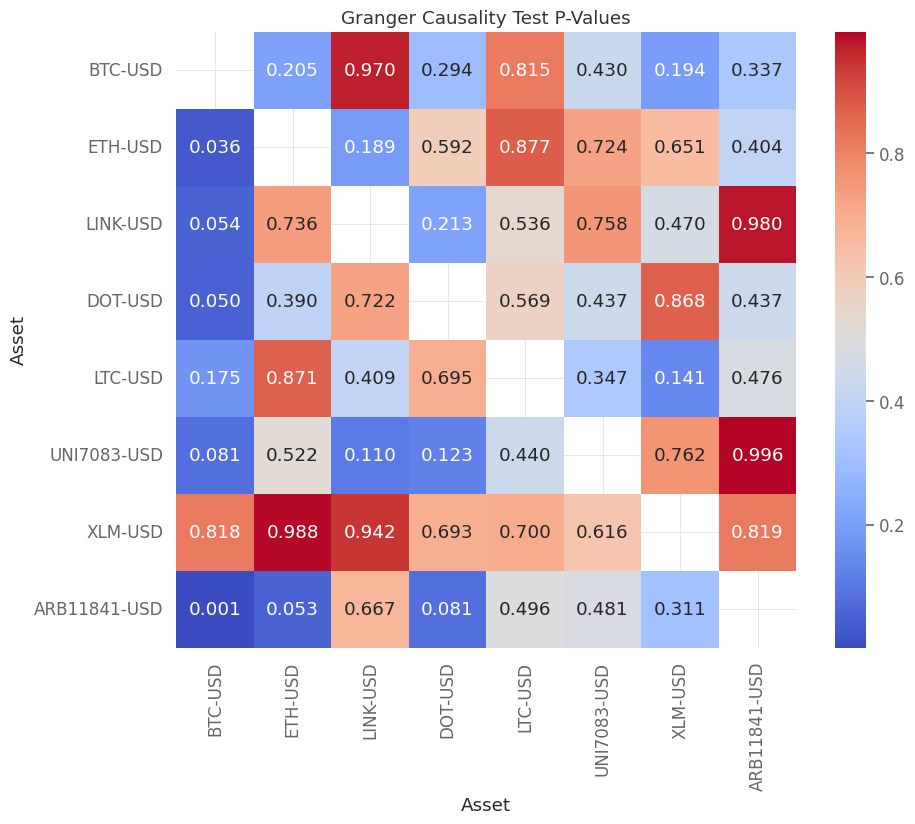

In [ ]:
# Plot heatmap for Granger Causality Test P-Values
plt.figure(figsize=(10, 8))
sns.heatmap(p_values_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Granger Causality Test P-Values')
plt.xlabel('Asset')
plt.ylabel('Asset')
plt.show()

**Johansen's cointegration tests**

In [ ]:

from statsmodels.tsa.vector_ar.vecm import coint_johansen


# Define the assets for the Coint cointegration test
assets = ['BTC-USD', 'ETH-USD', 'LINK-USD', 'DOT-USD', 'LTC-USD', 'UNI7083-USD', 'XLM-USD', 'ARB11841-USD']

# Download historical returns data for each asset
returns_data = {}
for asset in assets:
    data = yf.download(asset, start='2023-03-24', end='2024-02-13')['Adj Close'].pct_change().dropna()
    returns_data[asset] = data

returns_df = pd.DataFrame(returns_data)

# Create a matrix to store p-values of Johansen's cointegration tests
p_values_matrix_coint = pd.DataFrame(index=assets, columns=assets)

# Perform Johansen's cointegration test for each pair of assets
for asset1 in assets:
    for asset2 in assets:
        if asset1 != asset2:
            data = pd.concat([returns_df[asset1], returns_df[asset2]], axis=1).dropna()
            result = coint_johansen(data, det_order=0, k_ar_diff=1)
            p_value = result.lr1[0]
            p_values_matrix_coint.loc[asset1, asset2] = p_value

# Convert p-values to numeric
p_values_matrix_coint = p_values_matrix_coint.astype(float)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(p_values_matrix_coint, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Johansen's Cointegration Test P-Values")
plt.xlabel('Asset')
plt.ylabel('Asset')
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


**GARCH and ARCh analysis**

In [ ]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 5.2 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

# Define the assets for the analysis
assets = ['BTC-USD', 'ETH-USD', 'LINK-USD', 'DOT-USD', 'LTC-USD', 'UNI7083-USD', 'XLM-USD', 'ARB11841-USD']

# Loop through each asset and fit ARCH and GARCH models
for asset in assets:
    # Download historical returns data for the asset
    data = yf.download(asset, start='2023-03-24', end='2024-02-13')['Adj Close'].pct_change().dropna()
    data.index = pd.to_datetime(data.index)

    # Fit the ARCH model with a constant mean
    arch_model_arch = arch_model(data, vol='ARCH')
    arch_result_arch = arch_model_arch.fit()

    # Display ARCH model summary
    print(f"ARCH Model Summary for {asset}:")
    print(arch_result_arch.summary())
    print("="*80)

    # Fit the GARCH model with a constant mean
    arch_model_garch = arch_model(data, vol='GARCH')
    garch_result = arch_model_garch.fit()

    # Display GARCH model summary
    print(f"GARCH Model Summary for {asset}:")
    print(garch_result.summary())
    print("="*80)

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004487. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004487. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
[************

Iteration:      1,   Func. Count:      5,   Neg. LLF: 257277401.5227009
Iteration:      2,   Func. Count:     15,   Neg. LLF: -564.6262858392818
Iteration:      3,   Func. Count:     22,   Neg. LLF: -791.4500323768325
Iteration:      4,   Func. Count:     27,   Neg. LLF: -792.2146240859445
Iteration:      5,   Func. Count:     32,   Neg. LLF: -792.3302586861344
Iteration:      6,   Func. Count:     37,   Neg. LLF: -792.6396645328316
Iteration:      7,   Func. Count:     41,   Neg. LLF: -792.639668497443
Iteration:      8,   Func. Count:     44,   Neg. LLF: -792.6396684974196
Optimization terminated successfully    (Exit mode 0)
            Current function value: -792.639668497443
            Iterations: 8
            Function evaluations: 44
            Gradient evaluations: 8
ARCH Model Summary for BTC-USD:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:          

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00161. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00161. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                758.279
Distribution:                  Normal   AIC:                          -1508.56
Method:            Maximum Likelihood   BIC:                          -1493.42
                                        No. Observations:                  325
Date:                Wed, Feb 21 2024   Df Residuals:                      324
Time:                        14:01:51   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.3706e-03  1.367e-03      1.002      0.316 

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00102. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00102. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      5,   Neg. LLF: 11620093.132716594
Iteration:      2,   Func. Count:     15,   Neg. LLF: -416.4894474320788
Iteration:      3,   Func. Count:     22,   Neg. LLF: -661.1620673528379
Iteration:      4,   Func. Count:     27,   Neg. LLF: -645.305049994706
Iteration:      5,   Func. Count:     33,   Neg. LLF: -666.8160094035678
Iteration:      6,   Func. Count:     37,   Neg. LLF: -666.8282020910673
Iteration:      7,   Func. Count:     41,   Neg. LLF: -666.8286168338975
Iteration:      8,   Func. Count:     45,   Neg. LLF: -666.8286184190156
Iteration:      9,   Func. Count:     48,   Neg. LLF: -666.828618419036
Optimization terminated successfully    (Exit mode 0)
            Current function value: -666.8286184190156
            Iterations: 9
            Function evaluations: 48
            Gradient evaluations: 9
ARCH Model Summary for DOT-USD:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:            

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001017. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001017. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
[****************

Iteration:      1,   Func. Count:      5,   Neg. LLF: 216491516.64485043
Iteration:      2,   Func. Count:     15,   Neg. LLF: -429.98133525748983
Iteration:      3,   Func. Count:     22,   Neg. LLF: -658.676666659333
Iteration:      4,   Func. Count:     26,   Neg. LLF: -658.6800976896766
Iteration:      5,   Func. Count:     30,   Neg. LLF: -658.685097420866
Iteration:      6,   Func. Count:     34,   Neg. LLF: 626074.4627001643
Iteration:      7,   Func. Count:     44,   Neg. LLF: -430.0426148129271
Iteration:      8,   Func. Count:     51,   Neg. LLF: -658.686201095411
Optimization terminated successfully    (Exit mode 0)
            Current function value: -658.6862016831856
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 8
ARCH Model Summary for LTC-USD:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:          

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001939. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001939. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      5,   Neg. LLF: 2085223.2117625773
Iteration:      2,   Func. Count:     15,   Neg. LLF: -317.7599321180116
Iteration:      3,   Func. Count:     22,   Neg. LLF: -564.4507647835242
Iteration:      4,   Func. Count:     26,   Neg. LLF: -563.6341708118805
Iteration:      5,   Func. Count:     31,   Neg. LLF: -537.4559185404075
Iteration:      6,   Func. Count:     36,   Neg. LLF: -571.7917684278365
Iteration:      7,   Func. Count:     40,   Neg. LLF: -572.0544775010601
Iteration:      8,   Func. Count:     44,   Neg. LLF: -572.0598578131641
Iteration:      9,   Func. Count:     48,   Neg. LLF: -572.0602794632648
Iteration:     10,   Func. Count:     52,   Neg. LLF: -572.0602976844291
Iteration:     11,   Func. Count:     55,   Neg. LLF: -572.0602973701992
Optimization terminated successfully    (Exit mode 0)
            Current function value: -572.0602976844291
            Iterations: 11
            Function evaluations: 55
            Gradient eva

[*********************100%%**********************]  1 of 1 completed

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1121064.3353380212
Iteration:      2,   Func. Count:     14,   Neg. LLF: 57382.143450794
Iteration:      3,   Func. Count:     20,   Neg. LLF: -450.4557489800376
Iteration:      4,   Func. Count:     27,   Neg. LLF: -540.5552496300786
Iteration:      5,   Func. Count:     33,   Neg. LLF: -539.5709146521201
Iteration:      6,   Func. Count:     39,   Neg. LLF: -543.5108581594512
Iteration:      7,   Func. Count:     42,   Neg. LLF: -543.5108581593473
Optimization terminated successfully    (Exit mode 0)
            Current function value: -543.5108581594512
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7
ARCH Model Summary for ARB11841-USD:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002099. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002099. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


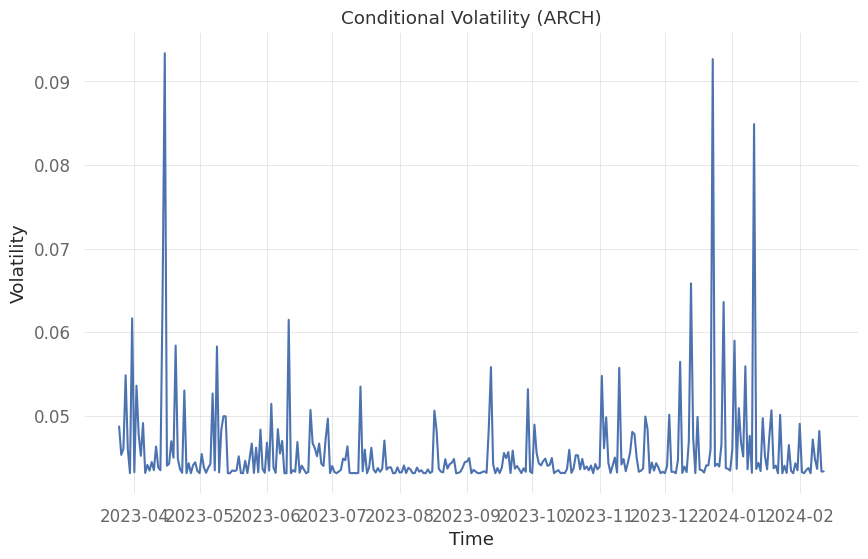

In [ ]:
# Plotting the conditional volatility (standard deviation) over time

plt.figure(figsize=(10, 6))
plt.plot(arch_result_arch.conditional_volatility)
plt.title('Conditional Volatility (ARCH)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.show()

In [ ]:
# Plotting the conditional volatility (standard deviation) over time
plt.figure(figsize=(12, 8))
plt.plot(garch_result.conditional_volatility)
plt.title('Conditional Volatility (GARCH)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.show()

**ARCH and GARCH forecasting volatility**

In [ ]:
# Define the assets for the analysis
assets = ['BTC-USD', 'ETH-USD', 'LINK-USD', 'DOT-USD', 'LTC-USD', 'UNI7083-USD', 'XLM-USD', 'ARB11841-USD']

# Forecasting parameters
forecast_horizon = 5

# Loop through each asset and fit ARCH and GARCH models
for asset in assets:
    # Download historical returns data for the asset
    data = yf.download(asset, start='2023-03-24', end='2024-02-20')['Adj Close'].pct_change().dropna()
    data.index = pd.to_datetime(data.index)

    # Fit the GARCH model with a constant mean
    arch_model_garch = arch_model(data, vol='GARCH')
    garch_result = arch_model_garch.fit(disp='off')

    # Forecast future volatility using the fitted GARCH model
    forecasts = garch_result.forecast(horizon=forecast_horizon)
    forecast_dates = pd.date_range(start='2024-02-20', periods=forecast_horizon + 1, closed='right')

    # Display GARCH model summary
    print(f"GARCH Model Summary for {asset}:")
    print(garch_result.summary())

    # The last day's forecast provides the forecasted volatility
    future_volatility = forecasts.variance.iloc[-1]

    print(f"\nForecasted Volatility for {asset}:")
    print(future_volatility)
    print("="*80)



[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000445. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
<ipython-input-34-31096f249ba3>:19: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start='2024-02-20', periods=forecast_horizon + 1, closed='right')
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The sc

GARCH Model Summary for BTC-USD:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                810.999
Distribution:                  Normal   AIC:                          -1614.00
Method:            Maximum Likelihood   BIC:                          -1598.78
                                        No. Observations:                  332
Date:                Wed, Feb 21 2024   Df Residuals:                      331
Time:                        16:05:12   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.0676e-03 

<ipython-input-34-31096f249ba3>:19: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start='2024-02-20', periods=forecast_horizon + 1, closed='right')
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001007. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
<ipython-input-34-31096f249ba3>:19: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start='2024-02-20', periods=forecast_horizon + 1, closed='right')
[*********************100%%**********************]  1 of 1 c

GARCH Model Summary for LINK-USD:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                602.025
Distribution:                  Normal   AIC:                          -1196.05
Method:            Maximum Likelihood   BIC:                          -1180.83
                                        No. Observations:                  332
Date:                Wed, Feb 21 2024   Df Residuals:                      331
Time:                        16:05:12   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.2835e-03

<ipython-input-34-31096f249ba3>:19: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start='2024-02-20', periods=forecast_horizon + 1, closed='right')
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001284. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
<ipython-input-34-31096f249ba3>:19: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start='2024-02-20', periods=forecast_horizon + 1, closed='right')
[*********************100%%**********************]  1 of 1 c

GARCH Model Summary for LTC-USD:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                677.709
Distribution:                  Normal   AIC:                          -1347.42
Method:            Maximum Likelihood   BIC:                          -1332.20
                                        No. Observations:                  332
Date:                Wed, Feb 21 2024   Df Residuals:                      331
Time:                        16:05:12   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.1885e

[*********************100%%**********************]  1 of 1 completed

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                575.472
Distribution:                  Normal   AIC:                          -1142.94
Method:            Maximum Likelihood   BIC:                          -1127.72
                                        No. Observations:                  332
Date:                Wed, Feb 21 2024   Df Residuals:                      331
Time:                        16:05:13   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.1771e-03  2.441e-03      0.892      0.372 


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002068. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
<ipython-input-34-31096f249ba3>:19: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start='2024-02-20', periods=forecast_horizon + 1, closed='right')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


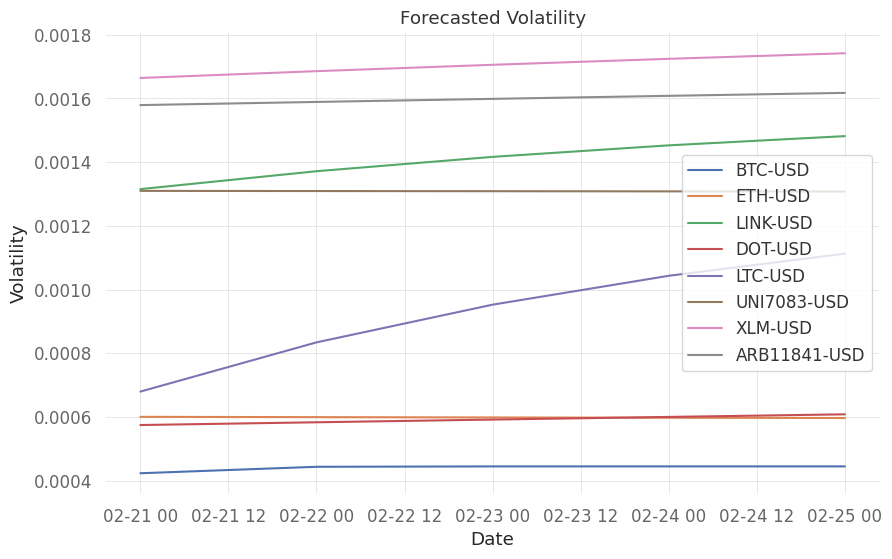

In [ ]:
import matplotlib.pyplot as plt

# Initialize a figure and axis
plt.figure(figsize=(10, 6))

# Loop through each asset and plot the forecasted volatility
for asset in assets:
    # Download historical returns data for the asset
    data = yf.download(asset, start='2023-03-24', end='2024-02-20')['Adj Close'].pct_change().dropna()
    data.index = pd.to_datetime(data.index)

    # Fit the GARCH model with a constant mean
    arch_model_garch = arch_model(data, vol='GARCH', rescale=False)  # Set rescale=False
    garch_result = arch_model_garch.fit(disp='off')  # Added disp='off' to suppress optimization output

    # Forecast future volatility using the fitted GARCH model
    forecasts = garch_result.forecast(horizon=forecast_horizon)
    forecast_dates = pd.date_range(start='2024-02-20', periods=forecast_horizon + 1, inclusive='right')  # Update inclusive argument

    # Plot forecasted volatility
    plt.plot(forecast_dates, forecasts.variance.iloc[-1], label=asset)

# Add title and labels
plt.title('Forecasted Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
future_volatility.mean().mean()

0.0015985742317879178

**Statistical Tests Conclusion**


1. The Kolmogorov-Smirnov test indicates that the data is not normally distributed, rendering the Sharpe Ratio unsuitable for analysis. Consequently, the risk measure has been adjusted to Maximum Drawdown and the Calmar Ratio.

2. The absence of measured covariance suggests no significant relationship between the assets.

3. The AD Fuller test reveals stationary data, supporting the rejection of the null hypothesis.

4. Analysis of the correlation matrix highlights significant correlations between various pairs:
- BTC and ETH exhibit a substantial correlation of 0.76.
- ETH and ARB show a notable correlation of 0.71.
- DOT and UNI have a somewhat significant correlation of 0.67.
- ARB and ETH also demonstrate a somewhat significant correlation of 0.71.

5. The Granger Causality Test P-Values matrix identifies significant causality between several pairs:
- BTC and LINK display a significant causality at 0.97.
- LINK and ARB exhibit significant causality at 0.98.
- UNI and ARB show significant causality at 0.99.
- XLM and ETH demonstrate significant causality at 0.988.
- XLM and LINK display significant causality at 0.94.

6. Johansen's cointegration test indicates long-term relationships, notably between UNI and XLM, with a standout value of 316.53.

7. GARCH and ARCH conditional volatility analysis reveal spiking volatility with occasional high spikes.

8. The GARCH forecasted Volatility chart illustrates varying volatility levels:
- BTC, ETH, and DOT exhibit low volatility.
- LINK and LTC display middle-to-high volatility with an increasing trend.
- UNI demonstrates high volatility with a decreasing trend.
- XLM and ARB emerge as the assets with the highest volatility, with XLM showing a slight increase and ARB maintaining a steady, high volatility level.


# Monte Carlo Simulation of Calmer Ratio

In [ ]:
# Initialize the components, to run a Monte Carlo Simulation.
num_of_portfolios = 10000
num_elements = len(assets)
risk_free_rate_annual = 0.0419

# Prep an array to store the weights as they are generated.
maxdd_all_weights = np.zeros((num_of_portfolios, num_elements))

# Prep an array to store the returns as they are generated.
maxdd_ret_arr = np.zeros(num_of_portfolios)

# Prep an array to store the Max Drawdown as they are generated.
max_dd_arr = np.zeros(num_of_portfolios)

# Prep an array to store the Calmar Ratio as they are generated.
calmar_ratio_arr = np.zeros(num_of_portfolios)

# Start the simulations.
for ind in range(num_of_portfolios):
    # Generate random weights and normalize to ensure sum(weights) = 1
    maxdd_weights = np.random.random(num_elements)
    maxdd_weights /= np.sum(maxdd_weights)

    # Calculate portfolio return
    maxdd_portfolio_return = np.sum(returns_df.mean() * maxdd_weights) * 252
    maxdd_ret_arr[ind] = maxdd_portfolio_return

    # Calculate the Max Drawdown
    maxdd_portfolio_returns_cumulative = (1 + returns_df.dot(maxdd_weights)).cumprod()
    running_max = np.maximum.accumulate(maxdd_portfolio_returns_cumulative)
    drawdown = (maxdd_portfolio_returns_cumulative) / running_max - 1.0
    max_dd_arr[ind] = drawdown.min()

    # Save weights
    maxdd_all_weights[ind, :] = maxdd_weights

    # Calculate Calmar Ratio
    calmar_ratio_arr = (maxdd_ret_arr - risk_free_rate_annual) / np.abs(max_dd_arr)

# Let's add all the different parts together.
maxdd_data = [maxdd_ret_arr, max_dd_arr, calmar_ratio_arr]

# Create DataFrame for Monte Carlo simulation results
maxdd_df = pd.DataFrame({
    'Returns': maxdd_ret_arr,
    'Max Drawdown': max_dd_arr,
    'Calmar Ratio': calmar_ratio_arr,
    'Portfolio Weights': [maxdd_weights for maxdd_weights in maxdd_all_weights]
})

print(maxdd_df.head())


Streaming output truncated to the last 5000 lines.
<ipython-input-54-efa38dc8069b>:38: RuntimeWarning: divide by zero encountered in divide
  calmar_ratio_arr = (maxdd_ret_arr - risk_free_rate_annual) / np.abs(max_dd_arr)
<ipython-input-54-efa38dc8069b>:38: RuntimeWarning: divide by zero encountered in divide
  calmar_ratio_arr = (maxdd_ret_arr - risk_free_rate_annual) / np.abs(max_dd_arr)
<ipython-input-54-efa38dc8069b>:38: RuntimeWarning: divide by zero encountered in divide
  calmar_ratio_arr = (maxdd_ret_arr - risk_free_rate_annual) / np.abs(max_dd_arr)
<ipython-input-54-efa38dc8069b>:38: RuntimeWarning: divide by zero encountered in divide
  calmar_ratio_arr = (maxdd_ret_arr - risk_free_rate_annual) / np.abs(max_dd_arr)
<ipython-input-54-efa38dc8069b>:38: RuntimeWarning: divide by zero encountered in divide
  calmar_ratio_arr = (maxdd_ret_arr - risk_free_rate_annual) / np.abs(max_dd_arr)
<ipython-input-54-efa38dc8069b>:38: RuntimeWarning: divide by zero encountered in divide
  cal

    Returns  Max Drawdown  Calmar Ratio  \
0  0.382440     -0.277906      1.225380   
1  0.442709     -0.294743      1.359859   
2  0.455451     -0.297878      1.388321   
3  0.498097     -0.300270      1.519288   
4  0.423833     -0.273947      1.394184   

                                   Portfolio Weights  
0  [0.09713884764400177, 0.15815252120593504, 0.1...  
1  [0.06550797291304497, 0.18760713822825215, 0.1...  
2  [0.19914709093567842, 0.047998428918073904, 0....  
3  [0.2569554573554641, 0.003349548756612046, 0.2...  
4  [0.12953802886121127, 0.23675251413113477, 0.0...  


<ipython-input-54-efa38dc8069b>:38: RuntimeWarning: divide by zero encountered in divide
  calmar_ratio_arr = (maxdd_ret_arr - risk_free_rate_annual) / np.abs(max_dd_arr)
<ipython-input-54-efa38dc8069b>:38: RuntimeWarning: divide by zero encountered in divide
  calmar_ratio_arr = (maxdd_ret_arr - risk_free_rate_annual) / np.abs(max_dd_arr)
<ipython-input-54-efa38dc8069b>:38: RuntimeWarning: divide by zero encountered in divide
  calmar_ratio_arr = (maxdd_ret_arr - risk_free_rate_annual) / np.abs(max_dd_arr)
<ipython-input-54-efa38dc8069b>:38: RuntimeWarning: divide by zero encountered in divide
  calmar_ratio_arr = (maxdd_ret_arr - risk_free_rate_annual) / np.abs(max_dd_arr)
<ipython-input-54-efa38dc8069b>:38: RuntimeWarning: divide by zero encountered in divide
  calmar_ratio_arr = (maxdd_ret_arr - risk_free_rate_annual) / np.abs(max_dd_arr)
<ipython-input-54-efa38dc8069b>:38: RuntimeWarning: divide by zero encountered in divide
  calmar_ratio_arr = (maxdd_ret_arr - risk_free_rate_ann

In [ ]:
# Biggest drawdown
maxdd_min = maxdd_df.loc[maxdd_df['Max Drawdown'].idxmin()]

pd.set_option('display.max_colwidth', None)
print(maxdd_min)

Returns                                                                                                                                                                                 0.489387
Max Drawdown                                                                                                                                                                           -0.432348
Calmar Ratio                                                                                                                                                                            1.035017
Portfolio Weights    [0.060419844120110984, 0.030580150487850396, 0.07076801096640256, 0.3860004469583271, 0.004718546951672928, 0.029157154345132826, 0.030304971868202735, 0.3880508743023005]
Name: 1299, dtype: object


In [ ]:
# Max Calmar Ratio
calmar_ratio = maxdd_df.loc[maxdd_df['Calmar Ratio'].idxmax()]

pd.set_option('display.max_colwidth', None)
print(calmar_ratio)

Returns                                                                                                                                                                                 0.714015
Max Drawdown                                                                                                                                                                           -0.325103
Calmar Ratio                                                                                                                                                                            2.067388
Portfolio Weights    [0.20382290343231857, 0.029603781754551587, 0.44895806023217794, 0.03694384778921332, 0.0029802541574682558, 0.03208992096401758, 0.13085086418142067, 0.11475036748883212]
Name: 1749, dtype: object


**Efficient Frontier - Calmar Ratio**

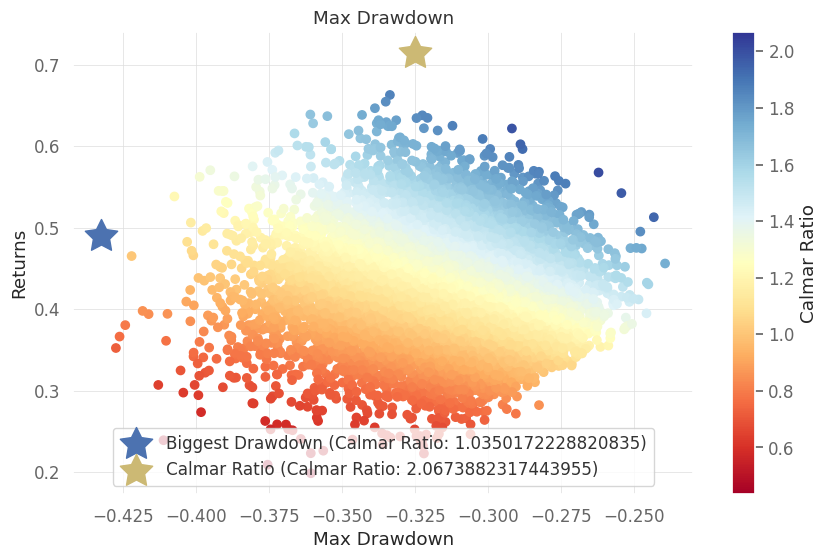

In [ ]:
# Plot the data for the Max Drawdown
plt.scatter(
    y=maxdd_df['Returns'],
    x=maxdd_df['Max Drawdown'],
    c=maxdd_df['Calmar Ratio'],
    cmap='RdYlBu'
)

# Plot some details.
plt.title('Max Drawdown')
plt.xlabel('Max Drawdown')
plt.colorbar(label='Calmar Ratio')
plt.ylabel('Returns')


# Plot Biggest
plt.scatter(
    maxdd_min[1],
    maxdd_min[0],
    marker=(5, 1, 0),
    color='b',
    s=600,
    label=f"Biggest Drawdown (Calmar Ratio: {maxdd_min[2]})"
)

# Plot Calmar Ratio
plt.scatter(
    calmar_ratio[1],
    calmar_ratio[0],
    marker=(5, 1, 0),
    color='y',
    s=600,
    label=f"Calmar Ratio (Calmar Ratio: {calmar_ratio[2]})"
)

plt.legend(loc='lower center')
plt.show()


**Max Sharpe Ratio Portfolio and Max Calmar Ratio Portfolio Results**

When comparing portfolios optimized for Max Sharpe Ratio and Max Calmar Ratio, it's essential to understand their distinct characteristics and suitability for different investments.

**Comparative Analysis between Portfolio with Sharpe Ratio and Calmar Ratio:**

1.  Focus on Risk Measurement:
    - The Calmar Ratio prioritizes return against downside risk, while the Sharpe Ratio considers total risk.

2.  Consideration of Downside Risk:
    - The Calmar Ratio incorporates maximum drawdown, representing the most significant loss experienced by the portfolio from its peak value. This metric is particularly relevant in highly volatile markets like cryptocurrencies. In contrast, the Sharpe Ratio does not explicitly account for such extreme downside risks.

3.  Suitability for Risk-Averse Investors:
    - New investors in cryptocurrencies, often characterized by risk aversion due to uncertainties surrounding cryptocurrency market volatility, may find the Calmar Ratio more suitable. This metric provides a more accurate assessment of risk and reward by explicitly considering potential significant losses.

Based on these considerations, for further analysis, I believe the Calmar Ratio offers a more precise measure of risk and reward, particularly for risk-averse investors navigating the volatile cryptocurrency market. Something to add is that Sharpe Ratio is not suitable for this analysis as the Kolmogorov-Smirnov test indicates that the data is not normally distributed and the risk measure has been adjusted to Maximum Drawdown and the Calmar Ratio.


# Solana

# Fundamental Analysis of Solana


Technology and Development:
    - Solana utilizes a unique consensus mechanism known as Proof of History, which enhances scalability and transaction throughput.
    - The platform boasts impressive transaction speeds, capable of processing over 65,000 transactions per second (TPS).

Use Cases and Adoption:
    - Solana serves as a host for various decentralized applications (dApps) spanning decentralized finance (DeFi), non-fungible tokens (NFTs), gaming, and other sectors.

Team and Community:
    - Solana benefits from a proficient development team led by Anatoly Yakovenko, a former engineer at Qualcomm, instilling confidence in its technical capabilities.

Market Position and Competition:
    - Despite competition from smart contract platforms like Ethereum and Polkadot, Solana's focus on scalability and performance distinguishes it from some competitors, positioning it favorably in the market.

Roadmap and Future Developments:
    - Ongoing initiatives aimed at enhancing scalability, security, and usability are poised to strengthen Solana's position as a leading blockchain platform, signaling positive prospects for future growth.

Regulatory Environment:
    - Regulatory clarity and compliance remain critical factors for Solana's sustained growth and widespread adoption, highlighting the importance of navigating the regulatory landscape effectively.

# On-Chain Analysis

On-Chain Indicators used in the analysis:

1.   Active Addresses
2.   Transaction Volume
3. Transaction Count
4. Staking Metrics
5. Token Distribution
6. Development Activity
7. Network Fees
8. Total Value Locked (TVL)
9. Supply on Exchanges
10. Network Growth
11. Whale Activity

For more detailed presentation of these metrics, data and insights for each metrics visit: https://dune.com/marcusjihansson/solana-eft-inclusion


**Broader insights drawn from these on-chain metrics:**

Increased Institutional Interest: The spike in whale activity and staking metrics suggests a growing interest from institutional investors. This type of investment often brings more stability and long-term growth potential to the network[4, 11].

Network Resilience and Trust: The high network uptime of 99.94% over twelve months is likely reflected in the consistent growth of active addresses, transaction volume, and transaction count [1, 3, 4].

Source: https://solana.com/news/network-performance-report-march-2024

Utility and Adoption: The growth in active addresses, transaction volume, and TVL [1, 2, 8] points to increased utility and adoption of Solana for various applications.

Development and Innovation: The continuous development activity [6] and the launch of new projects and partnerships likely contributed to the positive trends observed in active addresses, transaction volume, and transaction count [1, 2, 3].

Market Confidence Post-FTX Collapse: The resilience in price and on-chain metrics, such as active addresses, transaction volume, and staking metrics [1, 2, 4], demonstrates a restoration of market confidence following the FTX collapse.

Fee Revenue as a Health Indicator: The increase in network fees [7] mirrored the higher usage and transactional activity, as reflected in the transaction volume and count [2, 3].

Impact of Bitcoin Halving Anticipation: The positive sentiment around cryptocurrency markets, which may have influenced the whale activity and token distribution [5, 11], could have contributed to the overall price growth of Solana.

Regulatory Landscape: A stable regulatory environment during this period likely supported the continuous development activity [6] and the growth observed in on-chain metrics like active addresses, transaction volume, and TVL [1, 2, 8].


# Technical Analysis






In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=e55fbc9153834bdd938f5ef0f99fe42db4a05ecb1448c2a0b77cd571e8070498
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import pandas_ta as ta

In [ ]:
# Download historical data for SOLANA
solana_data = yf.download('SOL-USD', start="2023-03-24", end="2024-02-20")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Calculate indicators
solana_data.ta.ichimoku(append=True)
for length in [20, 50, 100, 200]:
    solana_data.ta.ema(close='close', length=length, append=True)
solana_data.ta.rsi(append=True)
solana_data.ta.atr(append=True)
solana_data.ta.cmf(append=True)

Date
2023-03-24         NaN
2023-03-25         NaN
2023-03-26         NaN
2023-03-27         NaN
2023-03-28         NaN
                ...   
2024-02-15    0.109245
2024-02-16    0.072356
2024-02-17    0.088440
2024-02-18    0.049680
2024-02-19    0.083881
Name: CMF_20, Length: 333, dtype: float64

In [ ]:
# Print the data with the calculated indicators
print(solana_data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-03-24   22.214151   22.258434   20.355827   20.678856   20.678856   
2023-03-25   20.677746   20.952482   20.184853   20.446646   20.446646   
2023-03-26   20.444178   21.129982   20.345690   20.975519   20.975519   
2023-03-27   20.976086   20.979824   19.508055   19.921675   19.921675   
2023-03-28   19.922195   20.764208   19.665567   20.470697   20.470697   
...                ...         ...         ...         ...         ...   
2024-02-15  116.985390  118.306496  111.775879  113.699409  113.699409   
2024-02-16  113.673073  114.253090  108.348724  110.445915  110.445915   
2024-02-17  110.443306  111.073044  106.125221  108.984016  108.984016   
2024-02-18  108.987602  114.001381  107.606720  112.174675  112.174675   
2024-02-19  112.178825  114.717979  111.081413  111.485329  111.485329   

                Volume      ISA_9    

**Average True Range**

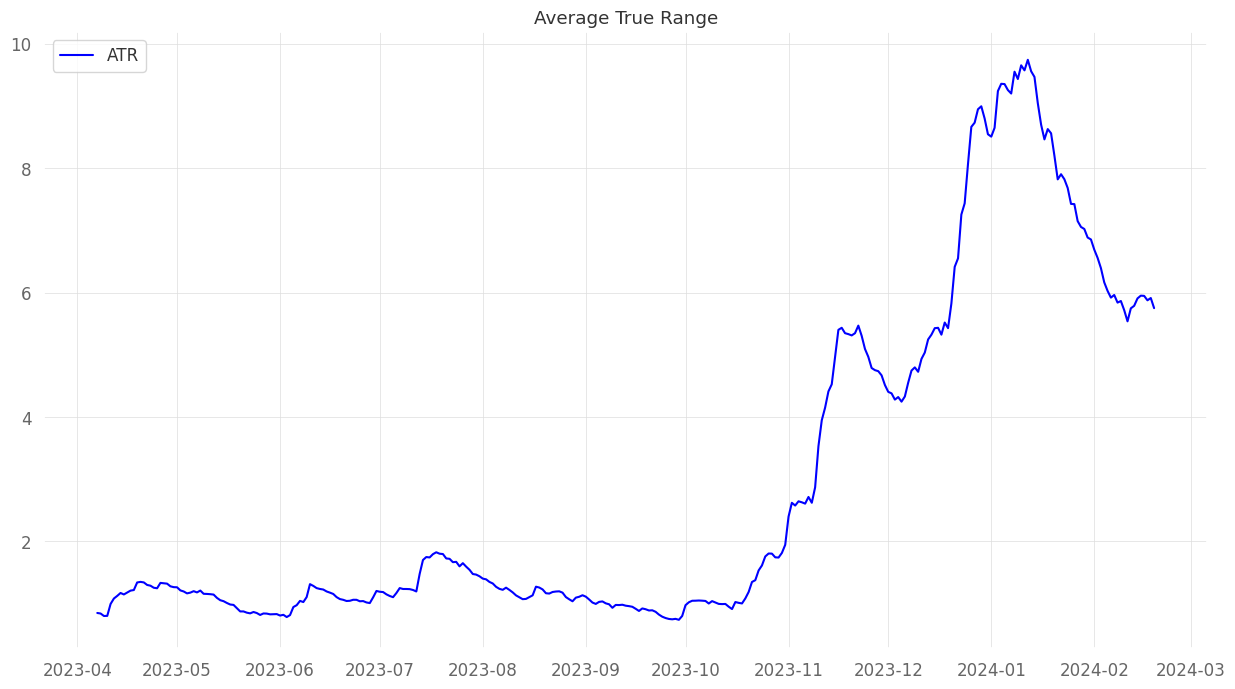

In [ ]:
# Plotting
plt.figure(figsize=(15,8))

# Plotting the ATR
plt.title('Average True Range')
plt.plot(solana_data['ATRr_14'], label='ATR', color='blue')
plt.legend(loc='upper left')

plt.show()

**Relative Strenght Index**

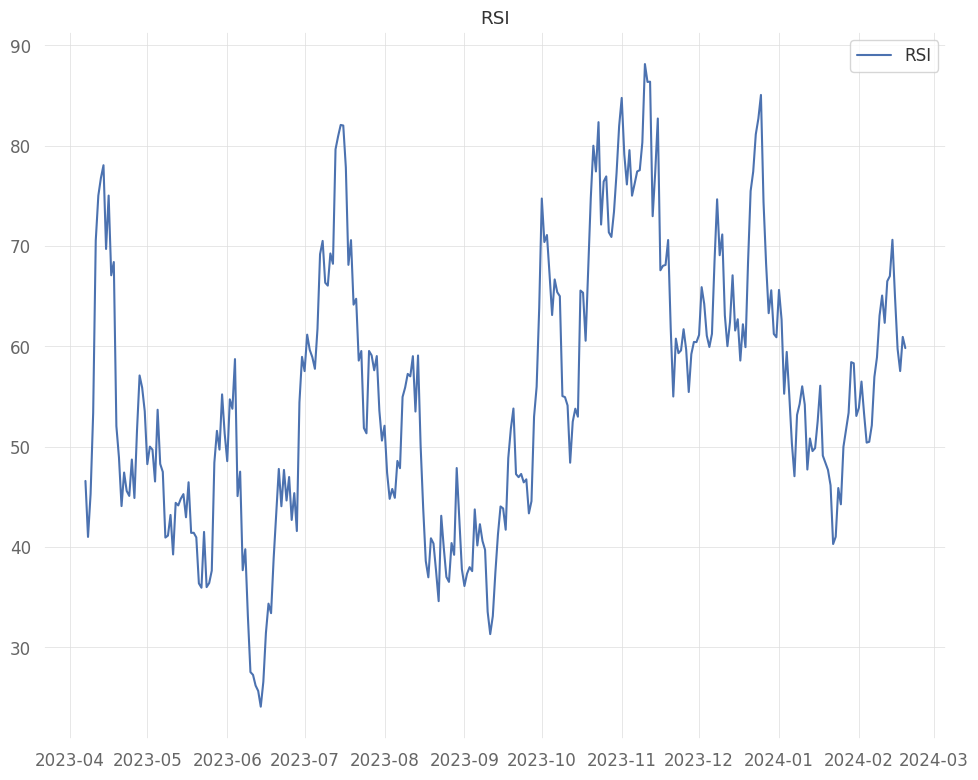

In [ ]:
plt.figure(figsize=(10,8))

# Plot RSI
plt.title('RSI')
plt.plot(solana_data['RSI_14'])
plt.legend(['RSI'])

plt.tight_layout()
plt.show()

**Solana prince and EMAs**

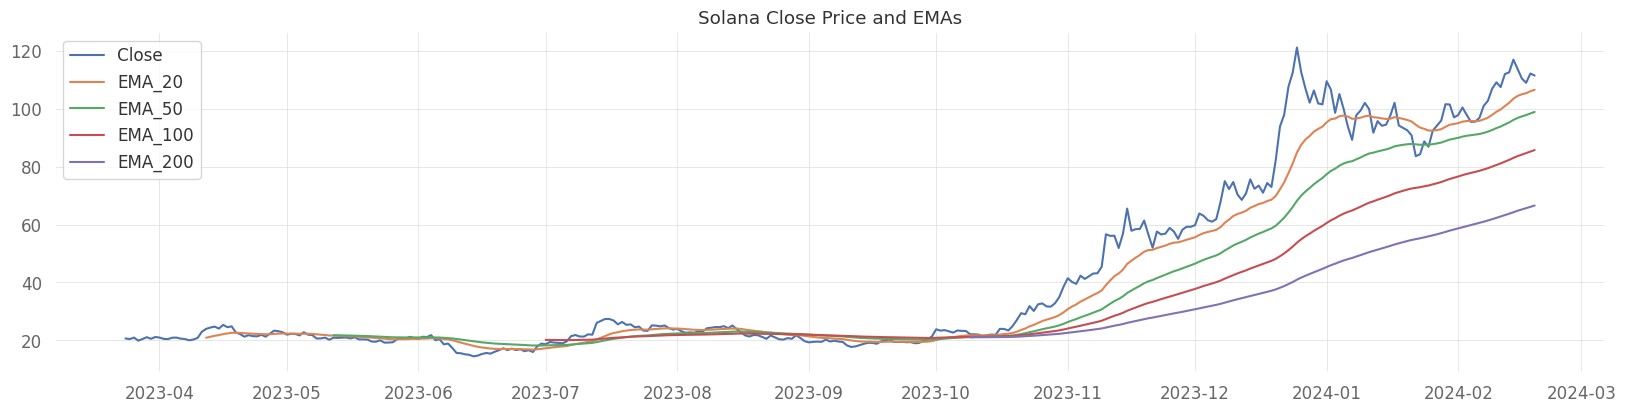

In [ ]:
# Plotting
plt.figure(figsize=(20,15))

# Plot close price and EMAs
plt.subplot(311)
plt.title('Solana Close Price and EMAs')
plt.plot(solana_data['Close'], label='Close')
for length in [20, 50, 100, 200]:
    plt.plot(solana_data[f'EMA_{length}'], label=f'EMA_{length}')
plt.legend()

**Solana price and Ichimoku clouds**

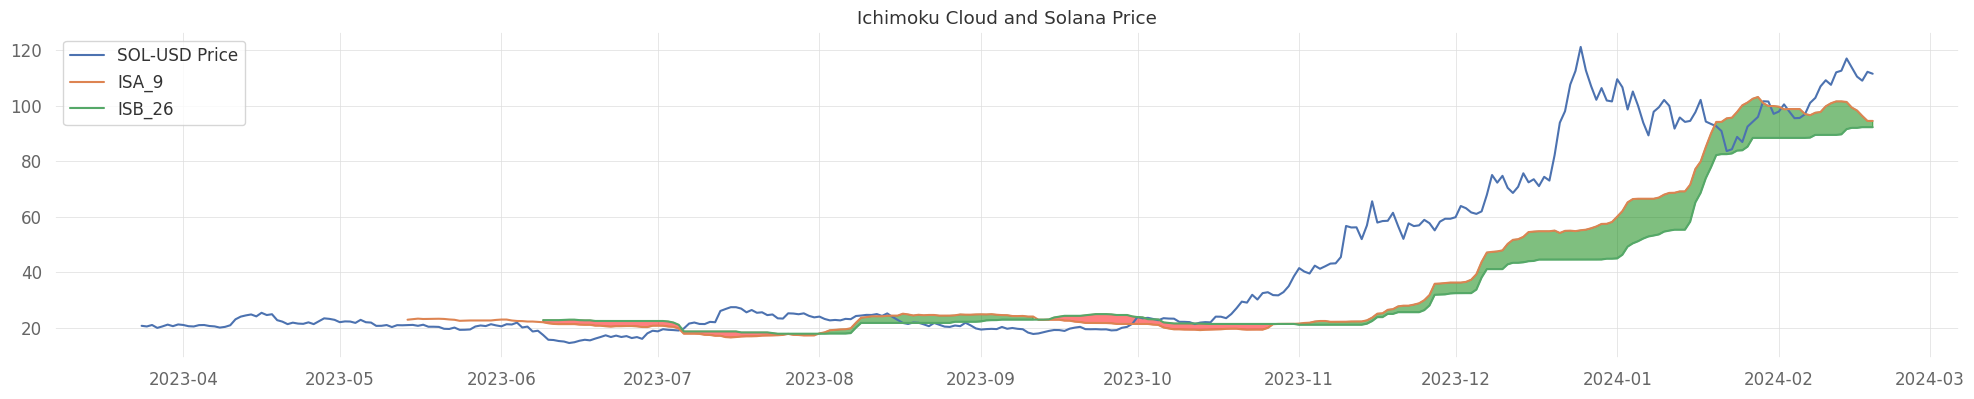

In [ ]:
# Plotting
plt.figure(figsize=(20,15))

# Plot Ichimoku Cloud and Solana price
plt.subplot(414)
plt.plot(solana_data['Close'], label='SOL-USD Price')
plt.plot(solana_data['ISA_9'], label='ISA_9') # Conversion Line
plt.plot(solana_data['ISB_26'], label='ISB_26') # Base Line
plt.fill_between(solana_data.index, solana_data['ISA_9'], solana_data['ISB_26'], where=(solana_data['ISA_9'] > solana_data['ISB_26']), color='green', alpha=0.5)
plt.fill_between(solana_data.index, solana_data['ISA_9'], solana_data['ISB_26'], where=(solana_data['ISA_9'] < solana_data['ISB_26']), color='red', alpha=0.5)
plt.title('Ichimoku Cloud and Solana Price')
plt.legend()

plt.tight_layout()
plt.show()

**Chaikin Money Flow over time**

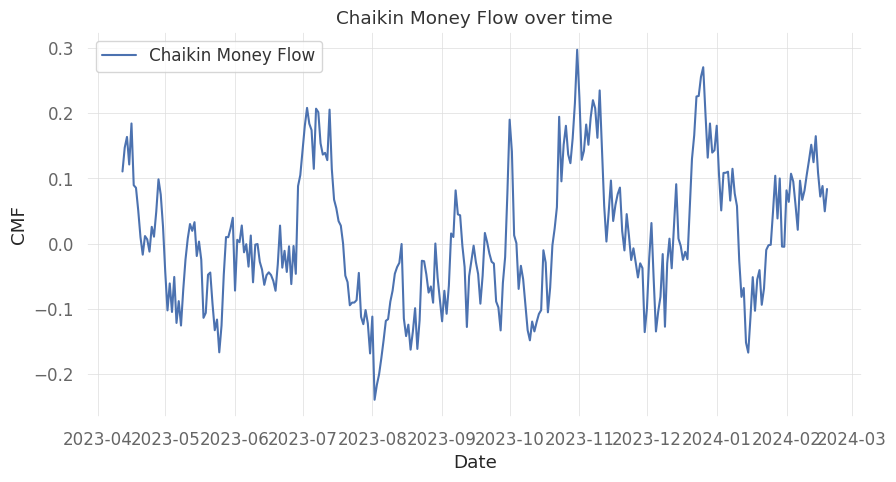

In [ ]:
# Plotting Chaikin Money Flow over time
plt.figure(figsize=(10,5))
plt.plot(solana_data.index, solana_data['CMF_20'], label='Chaikin Money Flow')
plt.title('Chaikin Money Flow over time')
plt.xlabel('Date')
plt.ylabel('CMF')
plt.legend()
plt.show()

# Technical Analysis of Solana Results


Average True Range (ATR):
- ATR indicates decreasing volatility from January 2024 to February 2024, suggesting lower market fluctuations and a potential entry opportunity for Solana.

Relative Strength Index (RSI):
- RSI in the 60s suggests that Solana is moderately overbought. Traders should remain vigilant for potential trend reversals or price consolidation, although a strong bullish trend persists.


Ichimoku Clouds and Exponential Moving Averages (EMAs):
- Both indicators show Solana's price above the indicator, indicating a robust bullish trend continuation.

Chaikin Money Flow (CMF):
- CMF hovering around 0.1 suggests some buying pressure but is relatively weak compared to selling pressure, indicating cautious market sentiment.

**Conclusion:**

The Average True Range indicates decreasing volatility, while the Chaikin Money Flow suggests weak buying pressure relative to selling pressure, echoing the moderately overbought indication from the RSI. However, the bullish trend is supported by the Ichimoku Clouds and EMAs, indicating a continuation of the upward trend. Traders should carefully monitor these indicators for potential shifts in market dynamics.

# Portfolio with Solana

**Hypothesis:**
The premise of the analysis is to show that Solana makes the portfolio perform better in relation to:

1. The asset makes the Calmar Ratio of the portfolio better
2. The asset makes the max drawdown of the portfolio better
3. The asset makes the portfolio VaR and Expected Shortfall better
4. The asset makes a significant difference to the covariance of the portfolio with Solana compared to the original portfolio
5. There are significant causal relationships in the data with Solana added
6. The Alpha and Beta performs better
7. The historical volatility beomes better after the addition of Solana



In [ ]:
# Define the assets for the Monte Carlo simulation
assets_sol = ['BTC-USD', 'ETH-USD', 'LINK-USD', 'DOT-USD', 'LTC-USD', 'UNI7083-USD', 'XLM-USD', 'ARB11841-USD', 'SOL-USD']

# Download historical returns data for each asset
returns_data_sol = {}
for asset in assets_sol:
    data = yf.download(asset, start='2023-03-24', end='2024-02-20')['Adj Close'].pct_change().dropna()
    returns_data_sol[asset] = data

returns_df_sol = pd.DataFrame(returns_data_sol)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
print(returns_df_sol )

             BTC-USD   ETH-USD  LINK-USD   DOT-USD   LTC-USD  UNI7083-USD  \
Date                                                                        
2023-03-25  0.000052 -0.004726 -0.016937 -0.019803 -0.022717    -0.028822   
2023-03-26  0.018172  0.018301  0.025023  0.024268  0.021228     0.012693   
2023-03-27 -0.030522 -0.033912 -0.053615 -0.029483 -0.045745    -0.025449   
2023-03-28  0.004725  0.033417  0.012016  0.032489 -0.001205     0.030467   
2023-03-29  0.039618  0.011404  0.061419  0.019179  0.024707     0.022107   
...              ...       ...       ...       ...       ...          ...   
2024-02-15  0.002158  0.016731 -0.016203  0.015642 -0.001213     0.089118   
2024-02-16  0.004268 -0.007325 -0.018899 -0.015489  0.011541    -0.006577   
2024-02-17 -0.009532 -0.006070  0.023618  0.006108 -0.008887     0.042302   
2024-02-18  0.008895  0.033131  0.003090  0.018912  0.010582    -0.015297   
2024-02-19 -0.006588  0.022430 -0.013729  0.022815  0.008226     0.006890   

**Covariance for the portfolio with addition of Solana**

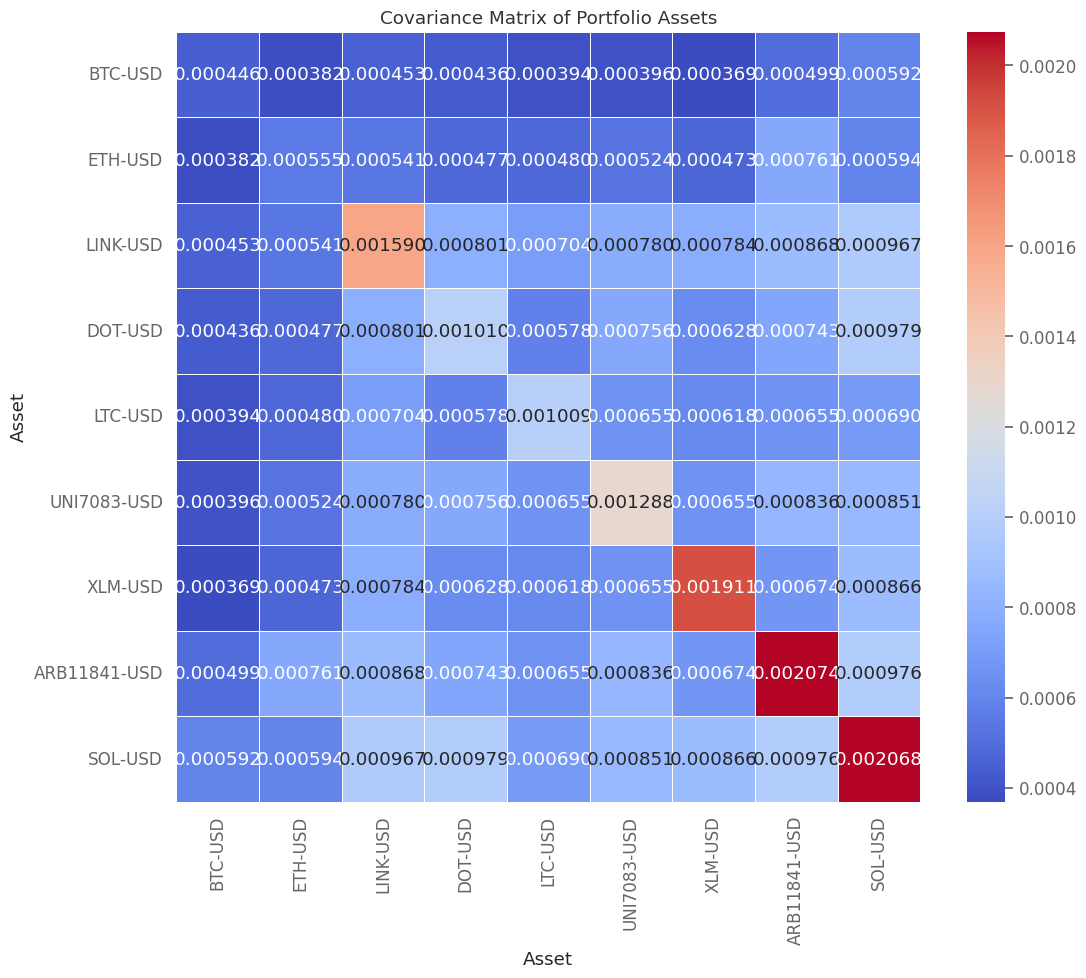

In [ ]:
sol_covariance_matrix = returns_df_sol.cov()

# Visualize covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(sol_covariance_matrix, annot=True, cmap='coolwarm', fmt=".6f", linewidths=.5)
plt.title('Covariance Matrix of Portfolio Assets')
plt.xlabel('Asset')
plt.ylabel('Asset')
plt.show()


In [ ]:
# Calculate the mean of each column
mean_of_each_column_sol = np.mean(sol_covariance_matrix, axis=0)

# Calculate the overall mean covariance
overall_mean_sol_cov = np.mean(mean_of_each_column_sol)
print(" Solana Overall Mean Covariance:", overall_mean_sol_cov)


 Solana Overall Mean Covariance: 0.0007261717828222604


**Granger Causality tests for the portfolio with addition of Solana**

In [ ]:
# Define the assets for the Granger causality tests
assets_sol = ['BTC-USD', 'ETH-USD', 'LINK-USD', 'DOT-USD', 'LTC-USD', 'UNI7083-USD', 'XLM-USD', 'ARB11841-USD', 'SOL-USD']

# Download historical returns data for each asset
returns_data_sol = {}
for asset in assets_sol:
    data = yf.download(asset, start='2023-03-24', end='2024-02-20')['Adj Close'].pct_change().dropna()
    returns_data_sol[asset] = data

returns_df_sol = pd.DataFrame(returns_data_sol)

# Create a matrix to store p-values of Granger causality tests
sol_p_values_matrix = pd.DataFrame(index=assets_sol, columns=assets_sol)

# Perform Granger causality test for each pair of assets
for asset1 in assets_sol:
    for asset2 in assets_sol:
        if asset1 != asset2:
            data = pd.concat([returns_df_sol[asset1], returns_df_sol[asset2]], axis=1).dropna()
            gc_test_result = grangercausalitytests(data, maxlag=3, verbose=False)
            p_value = gc_test_result[3][0]['ssr_ftest'][1]
            sol_p_values_matrix.loc[asset1, asset2] = p_value

# Convert p-values to numeric
sol_p_values_matrix = p_values_matrix.astype(float)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages

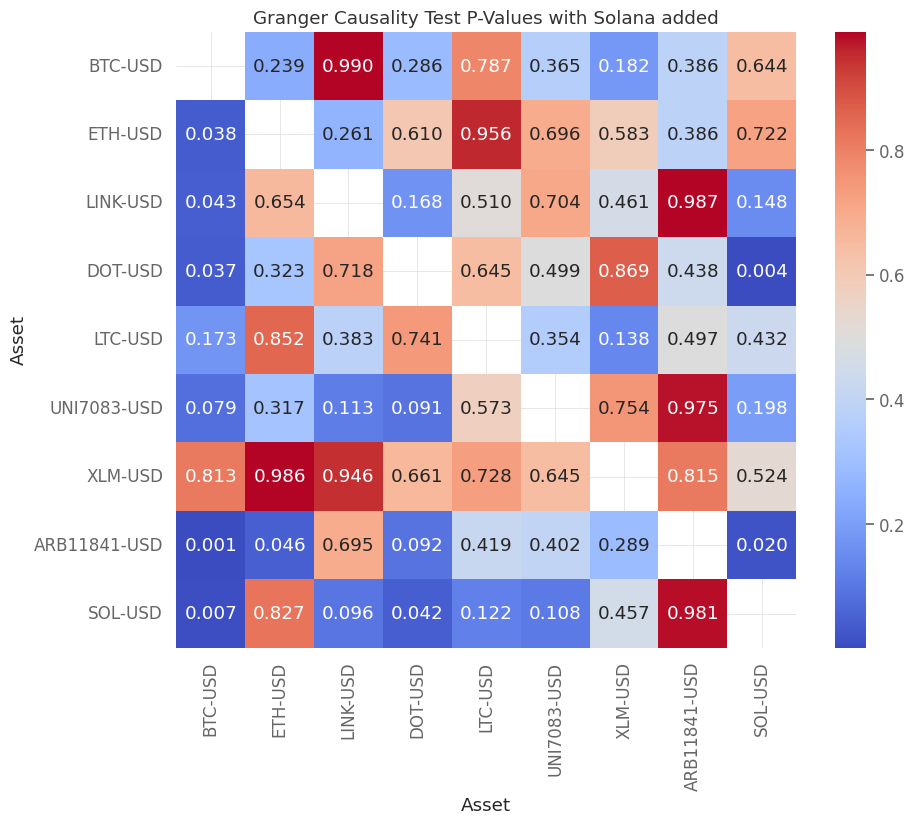

In [ ]:
# Plot heatmap for Granger Causality Test P-Values
plt.figure(figsize=(10, 8))
sns.heatmap(sol_p_values_matrix , annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Granger Causality Test P-Values with Solana added')
plt.xlabel('Asset')
plt.ylabel('Asset')
plt.show()

**Forecasted volatility with the addition of Solana through the GARCH and ARCH models**

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000445. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
<ipython-input-32-dc1761b1f4eb>:19: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start='2024-02-20', periods=forecast_horizon + 1, closed='right')
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The sc

GARCH Model Summary for BTC-USD:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                810.999
Distribution:                  Normal   AIC:                          -1614.00
Method:            Maximum Likelihood   BIC:                          -1598.78
                                        No. Observations:                  332
Date:                Wed, Feb 21 2024   Df Residuals:                      331
Time:                        16:04:08   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.0676e-03 


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001006. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
<ipython-input-32-dc1761b1f4eb>:19: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start='2024-02-20', periods=forecast_horizon + 1, closed='right')
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001284. Parameter
estimation work better when this valu

GARCH Model Summary for LTC-USD:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                677.709
Distribution:                  Normal   AIC:                          -1347.42
Method:            Maximum Likelihood   BIC:                          -1332.20
                                        No. Observations:                  332
Date:                Wed, Feb 21 2024   Df Residuals:                      331
Time:                        16:04:09   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.1885e

<ipython-input-32-dc1761b1f4eb>:19: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start='2024-02-20', periods=forecast_horizon + 1, closed='right')
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002061. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
<ipython-input-32-dc1761b1f4eb>:19: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start='2024-02-20', periods=forecast_horizon + 1, closed='right')
[*********************100%%**********************]  1 of 1 c

GARCH Model Summary for SOL-USD:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                567.990
Distribution:                  Normal   AIC:                          -1127.98
Method:            Maximum Likelihood   BIC:                          -1112.76
                                        No. Observations:                  332
Date:                Wed, Feb 21 2024   Df Residuals:                      331
Time:                        16:04:09   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.6675e-03 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


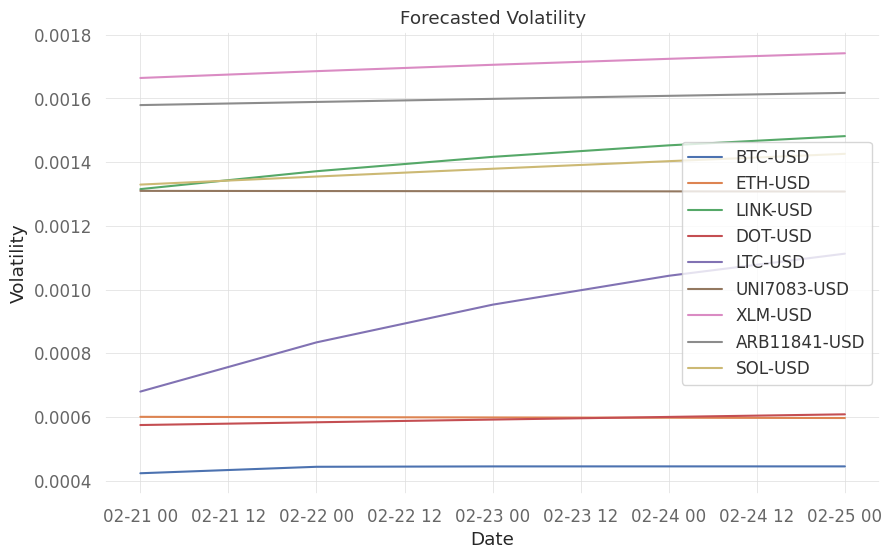

In [ ]:
# Define the assets for the analysis
assets_sol = ['BTC-USD', 'ETH-USD', 'LINK-USD', 'DOT-USD', 'LTC-USD', 'UNI7083-USD', 'XLM-USD', 'ARB11841-USD', 'SOL-USD']

# Forecasting parameters
forecast_horizon = 5

# Loop through each asset and fit ARCH and GARCH models
for asset in assets_sol:
    # Download historical returns data for the asset
    data = yf.download(asset, start='2023-03-24', end='2024-02-20')['Adj Close'].pct_change().dropna()
    data.index = pd.to_datetime(data.index)

    # Fit the GARCH model with a constant mean
    arch_model_garch = arch_model(data, vol='GARCH')
    garch_result = arch_model_garch.fit(disp='off')  # Added disp='off' to suppress optimization output

    # Forecast future volatility using the fitted GARCH model
    forecasts = garch_result.forecast(horizon=forecast_horizon)
    forecast_dates = pd.date_range(start='2024-02-20', periods=forecast_horizon + 1, closed='right')

    # Display GARCH model summary
    print(f"GARCH Model Summary for {asset}:")
    print(garch_result.summary())

    # The last day's forecast provides the forecasted volatility
    sol_future_volatility = forecasts.variance.iloc[-1]

# Initialize a figure and axis
plt.figure(figsize=(10, 6))

# Loop through each asset and plot the forecasted volatility
for asset in assets_sol:
    # Download historical returns data for the asset
    data = yf.download(asset, start='2023-03-24', end='2024-02-20')['Adj Close'].pct_change().dropna()
    data.index = pd.to_datetime(data.index)

    # Fit the GARCH model with a constant mean
    arch_model_garch = arch_model(data, vol='GARCH', rescale=False)  # Set rescale=False
    garch_result = arch_model_garch.fit(disp='off')  # Added disp='off' to suppress optimization output

    # Forecast future volatility using the fitted GARCH model
    forecasts = garch_result.forecast(horizon=forecast_horizon)
    forecast_dates = pd.date_range(start='2024-02-20', periods=forecast_horizon + 1, inclusive='right')  # Update inclusive argument

    # Plot forecasted volatility
    plt.plot(forecast_dates, forecasts.variance.iloc[-1], label=asset)

# Add title and labels
plt.title('Forecasted Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [ ]:
sol_future_volatility.mean().mean()

0.0013786744153269177

**Monte Carlo Analysis with Solana on Calmar Ratio**

In [ ]:
# Initialize the components, to run a Monte Carlo Simulation.
sol_num_of_portfolios = 10000
sol_num_elements = len(assets_sol)
sol_risk_free_rate_annual = 0.0419

# Prep an array to store the weights as they are generated.
sol_weights = np.zeros((sol_num_of_portfolios, sol_num_elements))

# Prep an array to store the returns as they are generated.
sol_ret_arr = np.zeros(sol_num_of_portfolios)

# Prep an array to store the Max Drawdown as they are generated.
sol_max_dd_arr = np.zeros(sol_num_of_portfolios)

# Prep an array to store the Calmar Ratio as they are generated.
sol_calmar_ratio_arr = np.zeros(sol_num_of_portfolios)

# Start the simulations.
for ind in range(sol_num_of_portfolios):
    # Generate random weights and normalize to ensure sum(weights) = 1
    sol_weights_tmp = np.random.random(sol_num_elements)
    sol_weights_tmp /= np.sum(sol_weights_tmp)

    # Calculate portfolio return
    sol_portfolio_return = np.sum(returns_df_sol.mean() * sol_weights_tmp) * 252
    sol_ret_arr[ind] = sol_portfolio_return

    # Calculate the Portfolio Returns Cumulative
    sol_portfolio_returns_cumulative = (1 + returns_df_sol.dot(sol_weights_tmp)).cumprod()

    # Calculate the Max Drawdown
    running_max = np.maximum.accumulate(sol_portfolio_returns_cumulative)
    drawdown = (sol_portfolio_returns_cumulative) / running_max - 1.0
    sol_max_dd_arr[ind] = drawdown.min()

    # Calculate Calmar Ratio
    sol_calmar_ratio_arr[ind] = (sol_portfolio_return - sol_risk_free_rate_annual) / np.abs(drawdown.min())

# Create DataFrame for Monte Carlo simulation results
sol_maxdd_df = pd.DataFrame({
    'Returns': sol_ret_arr,
    'Max Drawdown': sol_max_dd_arr,
    'Calmar Ratio': sol_calmar_ratio_arr,
    'Portfolio Weights': [sol_weights_tmp for _ in range(sol_num_of_portfolios)]
})

print(sol_maxdd_df.head())


    Returns  Max Drawdown  Calmar Ratio  \
0  0.686670     -0.342132      1.884565   
1  0.492605     -0.286532      1.572965   
2  0.480971     -0.300923      1.459084   
3  0.510238     -0.312629      1.498062   
4  0.511933     -0.301999      1.556405   

                                                                                                                                                                            Portfolio Weights  
0  [0.03692629400505949, 0.10859005371629164, 0.07186344466383596, 0.158856270004241, 0.17746973944802522, 0.08717517469082423, 0.0564243051361662, 0.11709146453051986, 0.18560325380503637]  
1  [0.03692629400505949, 0.10859005371629164, 0.07186344466383596, 0.158856270004241, 0.17746973944802522, 0.08717517469082423, 0.0564243051361662, 0.11709146453051986, 0.18560325380503637]  
2  [0.03692629400505949, 0.10859005371629164, 0.07186344466383596, 0.158856270004241, 0.17746973944802522, 0.08717517469082423, 0.0564243051361662, 0.117091464530519

In [ ]:
# Max Calmar Ratio for the Solana portfolio
sol_portfolio_calmar_ratio = sol_maxdd_df.loc[sol_maxdd_df['Calmar Ratio'].idxmax()]

pd.set_option('display.max_colwidth', None)
print(calmar_ratio)

Returns                                                                                                                                                                              0.586866
Max Drawdown                                                                                                                                                                        -0.267559
Calmar Ratio                                                                                                                                                                         2.036809
Portfolio Weights    [0.32540125233145273, 0.0934635515921125, 0.2529453045486726, 0.03849451949110696, 0.000616241366251724, 0.016989137529384704, 0.25671652038983783, 0.01537347275118102]
Name: 7148, dtype: object


In [ ]:
# Biggest drawdown for Solana portfolio
sol_maxdd_min = sol_maxdd_df.loc[sol_maxdd_df['Max Drawdown'].idxmin()]

pd.set_option('display.max_colwidth', None)
print(sol_maxdd_min)

Returns                                                                                                                                                                                                0.399848
Max Drawdown                                                                                                                                                                                          -0.403097
Calmar Ratio                                                                                                                                                                                           0.887994
Portfolio Weights    [0.03692629400505949, 0.10859005371629164, 0.07186344466383596, 0.158856270004241, 0.17746973944802522, 0.08717517469082423, 0.0564243051361662, 0.11709146453051986, 0.18560325380503637]
Name: 2896, dtype: object


In [ ]:
# Define the portfolio components
tickers_sol = {
    'BTC-USD': 0.32540125233145273,
    'ETH-USD': 0.0934635515921125,
    'LINK-USD':  0.2529453045486726,
    'DOT-USD': 0.03849451949110696,
    'LTC-USD': 0.03849451949110696,
    'UNI7083-USD': 0.000616241366251724,
    'XLM-USD': 0.016989137529384704,
    'ARB11841-USD': 0.25671652038983783,
    'SOL-USD': 0.01537347275118102
}

# Extract the ticker symbols from the dictionary
ticker_symbols_sol = list(tickers_sol.keys())

# Download the data for each ticker and calculate the portfolio returns
portfolio_sol_returns = pd.DataFrame()
for ticker in ticker_symbols_sol:
    df = yf.download(ticker, start='2023-03-24', end='2024-02-20')['Adj Close']
    if portfolio_sol_returns.empty:
        portfolio_sol_returns = df * tickers_sol[ticker]
    else:
        portfolio_sol_returns += df * tickers_sol[ticker]

portfolio_sol_returns = portfolio_sol_returns.pct_change().dropna()

print(portfolio_sol_returns)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Date
2023-03-25   -0.000049
2023-03-26    0.018178
2023-03-27   -0.030596
2023-03-28    0.005239
2023-03-29    0.039098
                ...   
2024-02-15    0.002370
2024-02-16    0.004079
2024-02-17   -0.009471
2024-02-18    0.009266
2024-02-19   -0.006134
Name: Adj Close, Length: 332, dtype: float64


**Histocial Volatility with the addition of Solana**

0.020798620755968413


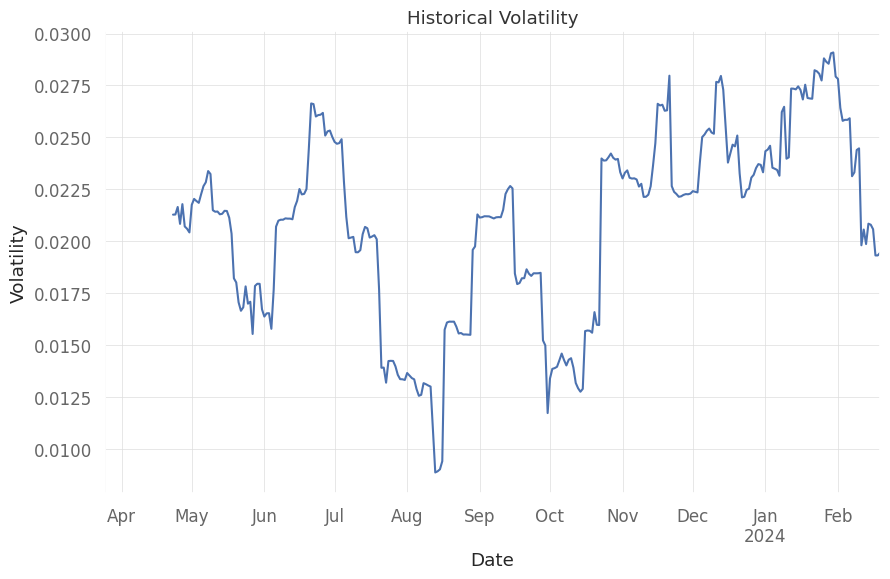

In [ ]:
portfolio_sol_returns_vol = portfolio_sol_returns.rolling(window=30).std()

portfolio_sol_returns_vol.mean()

print(portfolio_sol_returns_vol.mean())

# Visualize historical volatility
portfolio_sol_returns_vol.plot(figsize=(10, 6))
plt.title('Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

**Value at Risk and Expected Shortfall with the addition of Solana**

In [ ]:
# Define Interest rates and Volatilities for the VaR analysis for portfolio_sol_returns

# Get the number of elements in portfolio_sol_returns
num_elements_sol = len(portfolio_sol_returns)

# Create a pandas DataFrame for interest rates
interest_rates_sol = pd.DataFrame({
    'Interest_Rates': np.random.normal(0.05, 0.01, num_elements_sol) })

# Create a pandas DataFrame for volatilities
volatilities_sol = pd.DataFrame({
    'Volatilities': np.random.normal(0.2, 0.05, num_elements_sol) })

# Ensure the indices are aligned
interest_rates_sol.index = portfolio_sol_returns.index
volatilities_sol.index = portfolio_sol_returns.index

# Concatenate the independent variables (interest rates and volatilities) into a DataFrame
independent_vars_sol = pd.concat([interest_rates_sol, volatilities_sol], axis=1)
independent_vars_sol.columns = ['Interest_Rates', 'Volatilities']

# Drop any rows with NaN values
independent_vars_sol = independent_vars_sol.dropna()
portfolio_sol_returns = portfolio_sol_returns.dropna()

# Add a constant term for the intercept
independent_vars_sol = sm.add_constant(independent_vars_sol)

# Fit a multiple linear regression model
model_sol = sm.OLS(portfolio_sol_returns, independent_vars_sol)
results_sol = model_sol.fit()

# Extract the coefficients
coefficients_sol = results_sol.params

# Calculate the VaR for portfolio_sol_returns using the coefficients
alpha = 0.05
portfolio_sol_returns_estimated = np.dot(independent_vars_sol, coefficients_sol)
portfolio_sol_returns_residuals = portfolio_sol_returns - portfolio_sol_returns_estimated
residual_std_sol = np.std(portfolio_sol_returns_residuals)
z_score_sol = np.abs(stats.norm.ppf(alpha/2))
VaR_sol = z_score_sol * residual_std_sol

print("Value-at-Risk (VaR) for portfolio_sol_returns at", alpha, "confidence level:", VaR_sol)


Value-at-Risk (VaR) for portfolio_sol_returns at 0.05 confidence level: 0.04119878509307163


In [ ]:
#Espected Shortfall

ES_sol = -np.mean(portfolio_sol_returns[portfolio_sol_returns < -VaR])

print(ES_sol)

0.05424331179987093


**Compartion between Calmar Ratio portfolio and Solana portfolio**

In [ ]:
# Define the portfolio components
tickers_opt = {
    'BTC-USD': 0.32540125233145273,
    'ETH-USD': 0.0934635515921125,
    'LINK-USD':  0.2529453045486726,
    'DOT-USD': 0.03849451949110696,
    'LTC-USD': 0.03849451949110696,
    'UNI7083-USD': 0.000616241366251724,
    'XLM-USD': 0.016989137529384704,
    'ARB11841-USD': 0.25671652038983783,
    'SOL-USD': 0.01537347275118102
}

# Extract the ticker symbols from the dictionary
ticker_symbols_opt = list(tickers_opt.keys())

# Download the data for each ticker and calculate the portfolio returns
portfolio_returns_opt = pd.DataFrame()
for ticker in ticker_symbols_opt:
    df = yf.download(ticker, start='2023-03-24', end='2024-02-20')['Adj Close']
    if portfolio_returns_opt.empty:
        portfolio_returns_opt = df * tickers_opt[ticker]
    else:
        portfolio_returns_opt += df * tickers_opt[ticker]

portfolio_returns_opt =  portfolio_returns_opt.pct_change().dropna()

print(portfolio_returns_opt)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Date
2023-03-25   -0.000049
2023-03-26    0.018178
2023-03-27   -0.030596
2023-03-28    0.005239
2023-03-29    0.039098
                ...   
2024-02-15    0.002370
2024-02-16    0.004079
2024-02-17   -0.009471
2024-02-18    0.009266
2024-02-19   -0.006134
Name: Adj Close, Length: 332, dtype: float64


**Historical Volatility for the optimal portfolio**

0.020798620755968413


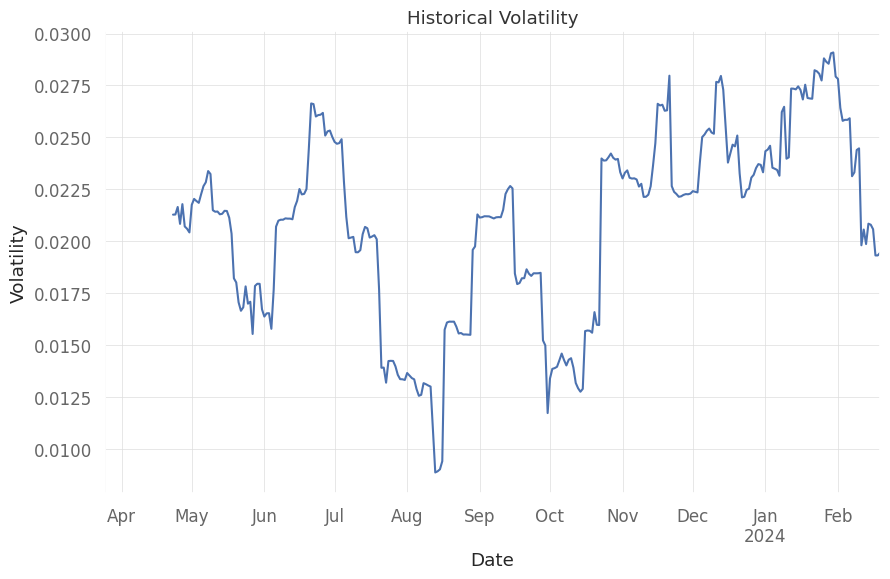

In [ ]:
portfolio_returns_opt_vol = portfolio_returns_opt.rolling(window=30).std()

portfolio_returns_opt_vol.mean()

print(portfolio_returns_opt_vol.mean())

# Visualize historical volatility
portfolio_returns_opt_vol.plot(figsize=(10, 6))
plt.title('Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

**VaR Calculations for the optimized portfolio**

In [ ]:
# Define Interest rates and Volatilities for the VaR analysis for portfolio_returns_opt

# Get the number of elements in portfolio_returns_opt
num_elements_opt = len(portfolio_returns_opt)

# Create a pandas DataFrame for interest rates
interest_rates_opt = pd.DataFrame({
    'Interest_Rates': np.random.normal(0.05, 0.01, num_elements_opt) })

# Create a pandas DataFrame for volatilities
volatilities_opt = pd.DataFrame({
    'Volatilities': np.random.normal(0.2, 0.05, num_elements_opt) })

# Ensure the indices are aligned
interest_rates_opt.index = portfolio_returns_opt.index
volatilities_opt.index = portfolio_returns_opt.index

# Concatenate the independent variables (interest rates and volatilities) into a DataFrame
independent_vars_opt = pd.concat([interest_rates_opt, volatilities_opt], axis=1)
independent_vars_opt.columns = ['Interest_Rates', 'Volatilities']

# Drop any rows with NaN values
independent_vars_opt = independent_vars_opt.dropna()
portfolio_returns_opt = portfolio_returns_opt.dropna()

# Add a constant term for the intercept
independent_vars_opt = sm.add_constant(independent_vars_opt)

# Fit a multiple linear regression model
model_opt = sm.OLS(portfolio_returns_opt, independent_vars_opt)
results_opt = model_opt.fit()

# Extract the coefficients
coefficients_opt = results_opt.params

# Calculate the VaR for portfolio_returns_opt using the coefficients
portfolio_returns_opt_estimated = np.dot(independent_vars_opt, coefficients_opt)
portfolio_returns_opt_residuals = portfolio_returns_opt - portfolio_returns_opt_estimated
residual_std_opt = np.std(portfolio_returns_opt_residuals)
z_score_opt = np.abs(stats.norm.ppf(alpha/2))
VaR_opt = z_score_opt * residual_std_opt

print("Value-at-Risk (VaR) for portfolio_returns_opt at", alpha, "confidence level:", VaR_opt)

Value-at-Risk (VaR) for portfolio_returns_opt at 0.2130908809784617 confidence level: 0.026181781009510005


In [ ]:
#Espected Shortfall for optimized portfolio

ES_opt = -np.mean(portfolio_returns_opt[portfolio_returns_opt < -VaR])

print(ES_opt)

0.05424331179987093


**Alpha and Beta compared between the "custom" portfolio, the Solana portfolio and the Optimal portfolio (using the Calmar Ratio)**

In [ ]:
# Define portfolio returns
portfolios = {
    'portfolio_returns': portfolio_returns,
    'portfolio_sol_returns': portfolio_sol_returns,
    'portfolio_returns_opt': portfolio_returns_opt
}

# Define benchmark
benchmark = qs.utils.download_returns('^CMC200')

# Calculate alpha and beta for each portfolio
for portfolio_name, portfolio_returns_data in portfolios.items():
    greeks = qs.stats.greeks(portfolio_returns_data, benchmark)
    alpha = greeks['alpha']
    beta = greeks['beta']
    print(f"Portfolio: {portfolio_name}")
    print(f"   Alpha: {alpha:.4f}")
    print(f"   Beta: {beta:.4f}")

[*********************100%%**********************]  1 of 1 completed


Portfolio: portfolio_returns
   Alpha: 0.2123
   Beta: 0.6171
Portfolio: portfolio_sol_returns
   Alpha: 0.2131
   Beta: 0.6168
Portfolio: portfolio_returns_opt
   Alpha: 0.2131
   Beta: 0.6168


# Conclusions



**Summary of Portfolio Analysis with Solana Integration**

**Alpha and Beta:** Beta improved in the optimized portfolio and Solana portfolio compared to the "custom" portfolio, but Alpha remained unchanged. This suggests that the addition of Solana didn't outperform the market nor significantly affect portfolio volatility.

 **Calmar Ratio, Returns, and Max Drawdown:** The Calmar Ratio stayed the same with Solana inclusion, but returns worsened compared to the optimized portfolio. However, the Max Drawdown decreased, which could be seen as a positive aspect of Solana's addition.

**Value at Risk (VaR) and Expected Shortfall:** VaR and Expected Shortfall showed no significant change with Solana inclusion.

**Historical Volatility and Mean Variance/Covariance:** Historical volatility remained relatively stable with Solana inclusion, indicating minimal impact on portfolio risk. Mean variance and covariance between portfolios were similar, indicating comparable risk exposure.

**Forecasted Volatility:** Solana's future volatility is positioned in the middle-upper band and is increasing, suggesting potential price movements in either direction.

**Future Mean Volatility:** Future mean volatility remained consistent for both portfolios, with minor differences favoring the Solana portfolio, indicating a stable outlook.

**Granger Causality Test:** Causal relationships were observed in the Granger Causality Test, indicating interactions between Solana and other assets.

**Conclusion:** The integration of Solana into the portfolio had mixed effects. While it improved Beta and reduced Max Drawdown, it also led to lower returns and had minimal impact on risk metrics such as VaR and Expected Shortfall. The future outlook suggests stable volatility but with potential for price movements. Overall, the addition of Solana warrants careful consideration, balancing its benefits with its impact on portfolio performance and risk.
